# Analysis -  Mouse Gastrulation #
### stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
### celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
###                    'Haematoendothelial progenitors','Blood progenitors 1'}
### Using all 2000 genes to plot cell velocity

In [201]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

# Load Data

In [2]:
not_combined_detail=False

if not_combined_detail:
    # load raw
    raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
    load_raw_data = pd.read_csv(raw_data_path)

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth'
    path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    
    
    load_cellDancer['clusters']=load_raw_data['clusters']
    load_cellDancer['cellID']=load_raw_data['cellID']
    load_cellDancer['embedding1']=load_raw_data['embedding1']
    load_cellDancer['embedding2']=load_raw_data['embedding2']
    load_cellDancer
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv',index=False)

else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv')
# define output path
#output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [3]:
load_cellDancer

cellIndex      gene_name        s0        u0        s1        u1  \
0                 0  2810025M15Rik  1.515440  0.000000  1.514860  0.000022   
1                 1  2810025M15Rik  1.574459  0.000000  1.573860  0.000022   
2                 2  2810025M15Rik  1.744201  0.000000  1.743548  0.000020   
3                 3  2810025M15Rik  1.332406  0.000000  1.331888  0.000024   
4                 4  2810025M15Rik  1.261786  0.000000  1.261292  0.000025   
...             ...            ...       ...       ...       ...       ...   
24657995      12324          Zrsr2  0.255452  0.030816  0.323642  0.022484   
24657996      12325          Zrsr2  0.204272  0.049630  0.322781  0.036203   
24657997      12326          Zrsr2  0.230350  0.050146  0.349145  0.036532   
24657998      12327          Zrsr2  0.236227  0.052799  0.361591  0.038445   
24657999      12328          Zrsr2  0.234467  0.057909  0.372997  0.042155   

             alpha      beta     gamma      cost             clusters  \
0         0.001560  0.022612  0.005908  0.087183  Blood progenitors 2   
1         0.001522  0.022650  0.005876  0.087183  Blood progenitors 2   
2         0.001426  0.022751  0.005787  0.087183  Blood progenitors 2   
3         0.001682  0.022495  0.006009  0.087183  Blood progenitors 2   
4         0.001732  0.022449  0.006049  0.087183  Blood progenitors 2   
...            ...       ...       ...       ...                  ...   
24657995  0.005919  0.101278  0.144163  0.126370           Erythroid3   
24657996  0.008434  0.100651  0.142879  0.126370           Erythroid3   
24657997  0.008174  0.100769  0.143180  0.126370           Erythroid3   
24657998  0.008380  0.100769  0.143180  0.126370           Erythroid3   
24657999  0.008959  0.100709  0.143022  0.126370           Erythroid3   

               cellID  embedding1  embedding2  
0            cell_363    3.460521   15.574629  
1            cell_382    2.490433   14.971734  
2            cell_385    2.351203   15.267069  
3            cell_393    5.899098   14.388825  
4            cell_398    4.823139   15.374831  
...               ...         ...         ...  
24657995  cell_139318    8.032358    7.603037  
24657996  cell_139321   10.352904    6.446736  
24657997  cell_139326    9.464873    7.261099  
24657998  cell_139327    9.990495    7.243880  
24657999  cell_139330    8.260699    7.935455  

[24658000 rows x 14 columns]

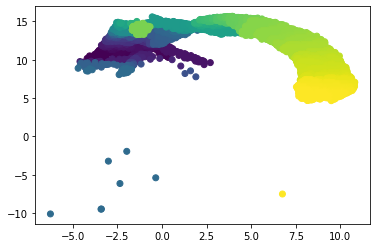

In [85]:
merged

index  time  cellIndex gene_name        s0        u0        s1  \
0       3592   0.0       3592   Smarca2  0.662104  0.174482  0.639948   
1      12314   0.0      12314   Smarca2  0.570327  0.180019  0.569723   
2       6927   0.0       6927   Smarca2  0.459883  0.053328  0.408794   
3       9880   0.0       9880   Smarca2  0.398971  0.058427  0.362851   
4       9427   0.0       9427   Smarca2  0.395262  0.054747  0.357592   
...      ...   ...        ...       ...       ...       ...       ...   
12324  11513   1.0      11513   Smarca2  0.004237  0.005014  0.006794   
12325   7456   1.0       7456   Smarca2  0.000000  0.000000  0.000000   
12326   7452   1.0       7452   Smarca2  0.004075  0.000000  0.003366   
12327   3968   1.0       3968   Smarca2  0.014125  0.000000  0.011661   
12328  11413   1.0      11413   Smarca2  0.010059  0.000000  0.008305   

             u1     alpha      beta     gamma      cost  \
0      0.134392  0.015292  0.157295  0.286465  0.046685   
1      0.139168  0.019294  0.157494  0.283545  0.046685   
2      0.039985  0.005169  0.171444  0.283359  0.046685   
3      0.043958  0.006380  0.171060  0.281105  0.046685   
4      0.041169  0.006105  0.171537  0.281104  0.046685   
...         ...       ...       ...       ...       ...   
12324  0.004907  0.007919  0.177946  0.267228  0.046685   
12325  0.001202  0.007457  0.178544  0.267268  0.046685   
12326  0.001190  0.007382  0.178548  0.267451  0.046685   
12327  0.001161  0.007198  0.178559  0.267901  0.046685   
12328  0.001172  0.007272  0.178555  0.267720  0.046685   

                             clusters       cellID  embedding1  embedding2  
0      Haematoendothelial progenitors   cell_36183   -3.637248   10.940038  
1      Haematoendothelial progenitors  cell_139266   -3.414126   11.173108  
2      Haematoendothelial progenitors   cell_91562   -1.346472   12.334801  
3      Haematoendothelial progenitors  cell_126097   -1.594642   12.237121  
4      Haematoendothelial progenitors  cell_122321   -1.674370   12.362613  
...                               ...          ...         ...         ...  
12324                      Erythroid3  cell_135548    8.023061    5.393051  
12325                      Erythroid3   cell_96487    7.862419    6.003148  
12326                      Erythroid3   cell_96459    7.923254    5.762695  
12327                      Erythroid3   cell_38417    8.415958    5.695527  
12328                      Erythroid3  cell_135017    8.265903    4.995063  

[12329 rows x 16 columns]

In [6]:
def gene_pseudotime(gene,load_cellDancer,colors=None,save_path=None):
    
    # TODO: Find a suitabe to get cell_time_time_sort variable,(about 10 minutes), in this script, cell_time_time_sort was obtained from global variable
    
    plt.figure()
    onegene=load_cellDancer[load_cellDancer.gene_name==gene]
    merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future
    plt.title(gene)
    
    cluster_info=onegene.clusters
    
    # build color map
    if colors is None:
        color_list=grove2.copy()
        cluster_list=onegene.clusters.drop_duplicates()
        from itertools import cycle
        colors = dict(zip(cluster_list, cycle(color_list)) if len(cluster_list) > len(color_list) else zip(cycle(cluster_list), color_list))
    
    # plot legend
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    def gen_Line2D(label, markerfacecolor):
        return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)
    legend_elements = []
    for i in colors:
        legend_elements.append(gen_Line2D(i, colors[i]))
    lgd=plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')
    
    custom_map=merged.clusters.map(colors)
    plt.scatter(merged.time,merged.s0,c=custom_map,s=3)
    
    if save_path is not None:
        plt.savefig(save_path+gene+'.pdf',bbox_inches='tight',bbox_extra_artists=(lgd,),)
    plt.show()

def gene_list_pseudotime(gene_list,load_cellDancer,colors=None,save_path=None):
    for gene in gene_list:
        gene_pseudotime(gene,load_cellDancer,colors=colors,save_path=save_path)

# todo: add cluster color
# todo: plt.show() for all plot functions
# todo: build map itself
# from colormap import *
# color_list=solarExtra02.copy()

In [ ]:
# NOT SMOOTHED YET - Not using

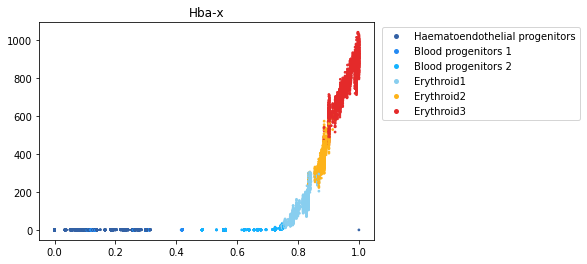

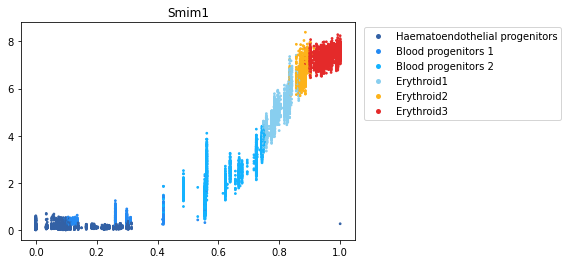

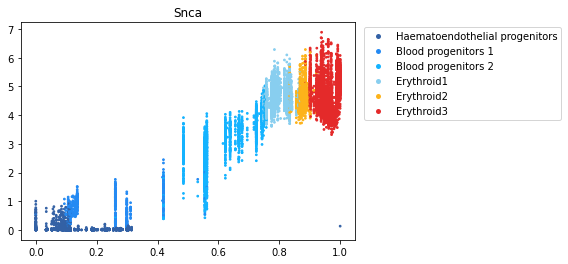

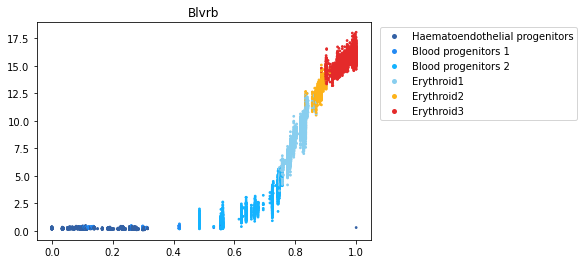

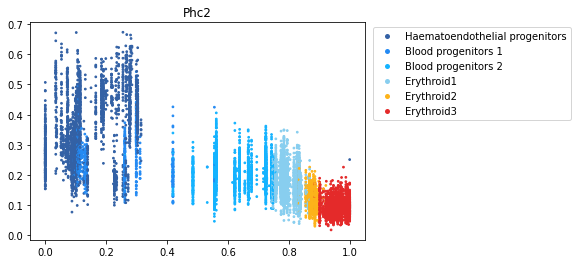

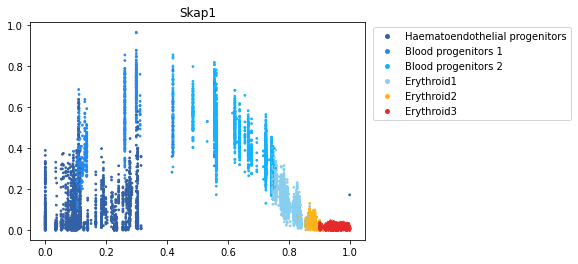

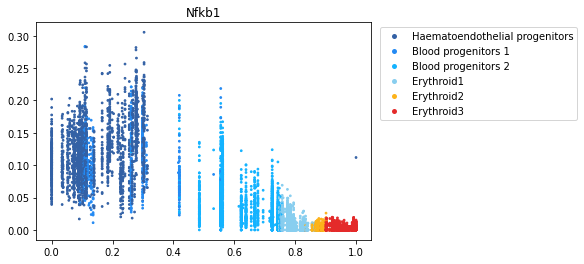

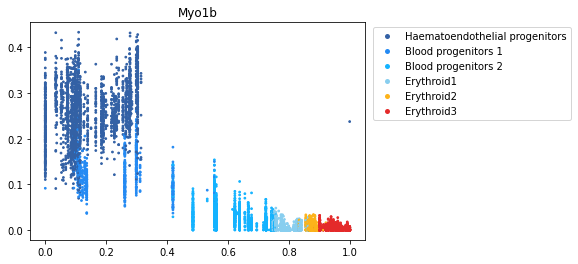

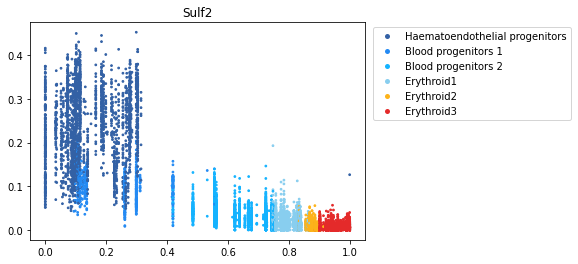

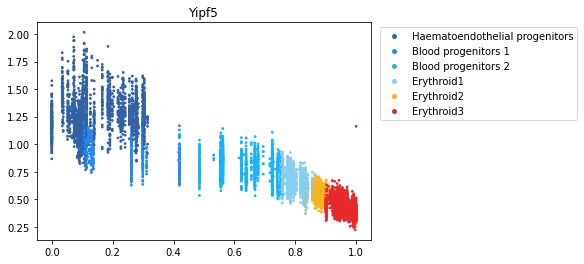

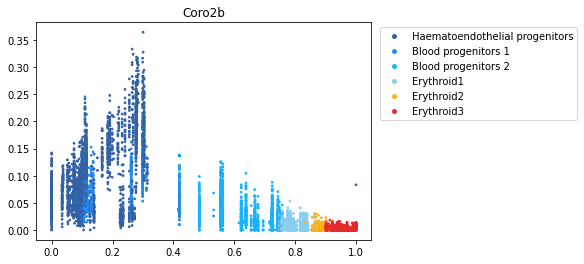

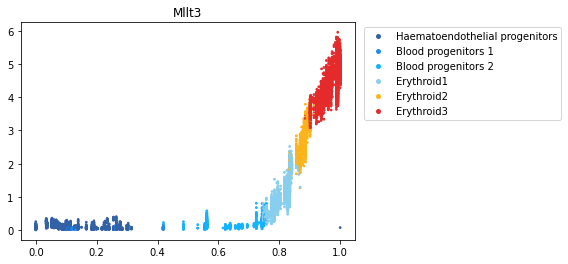

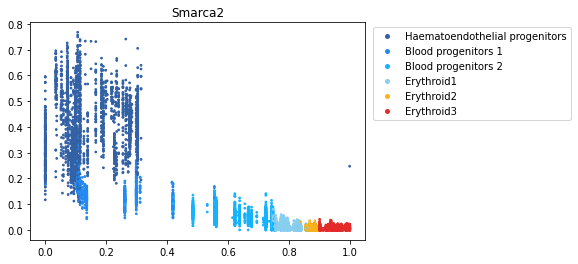

In [229]:

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_no_smooth/'
#save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_no_smooth/pseudo_time_Gastrulation_combined.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

In [ ]:
# SMOOTHED - Not using

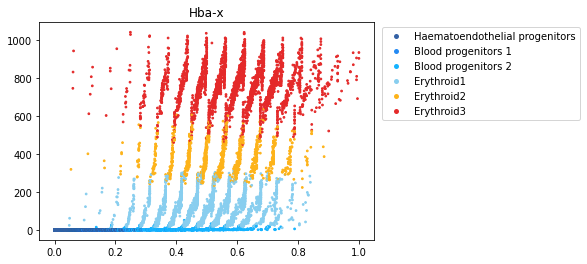

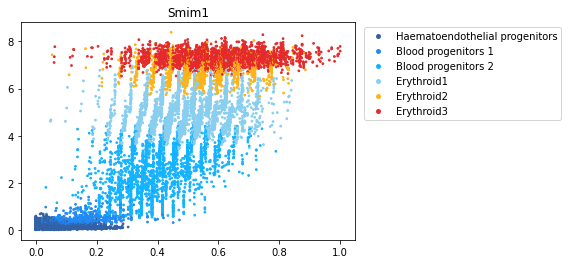

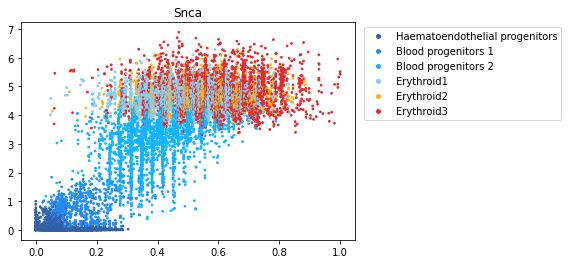

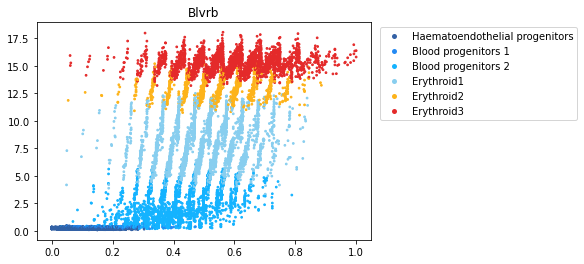

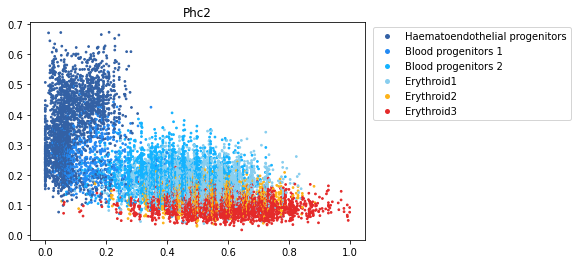

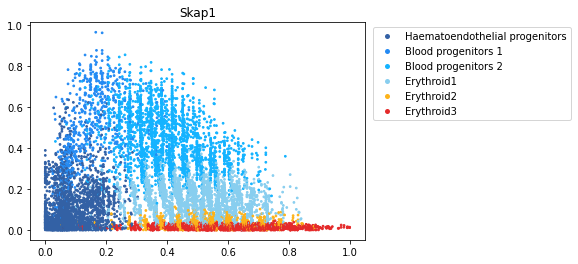

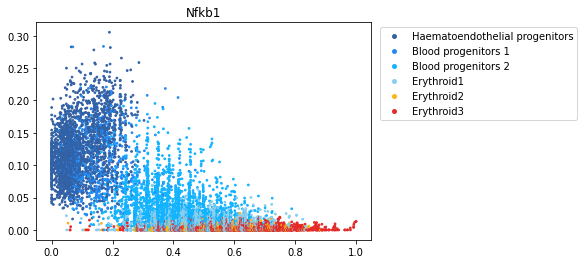

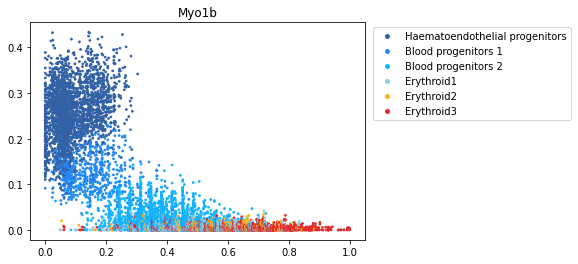

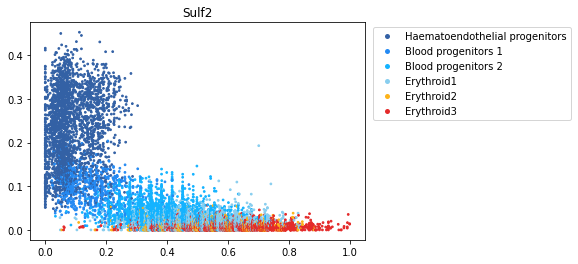

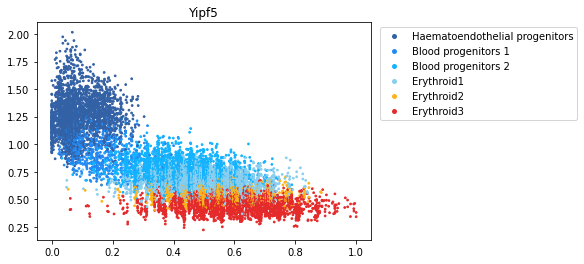

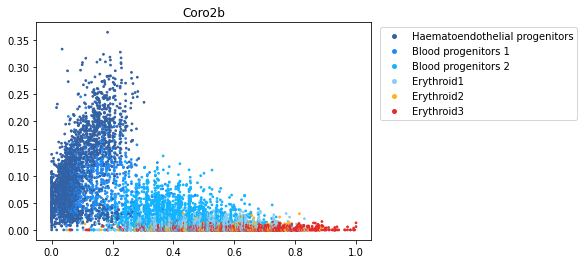

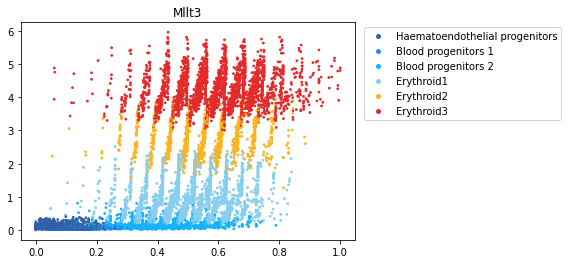

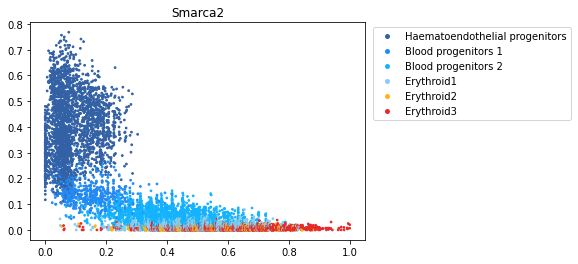

In [7]:

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_smooth/'
save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/pseudotime_gene_smooth/pseudo_time_Gastrulation_combined_10NN_smooth.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

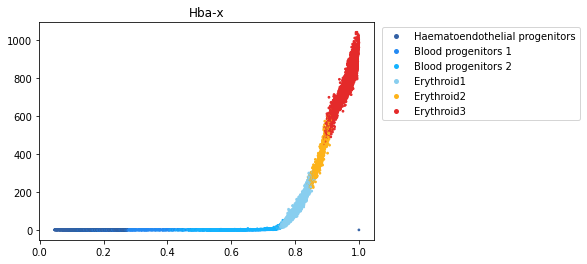

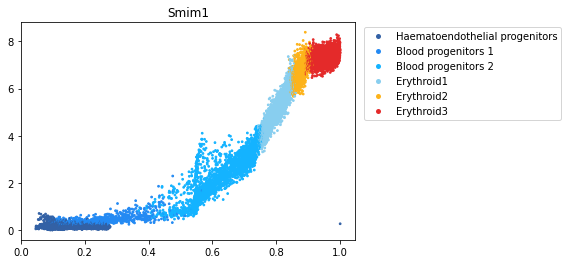

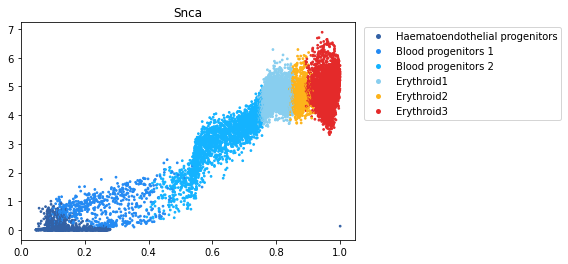

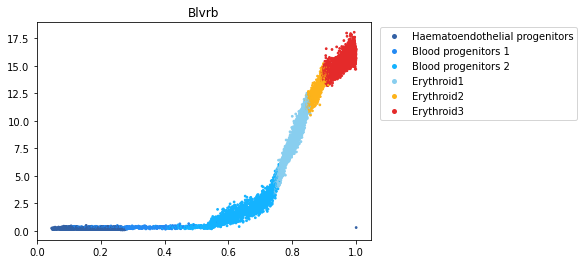

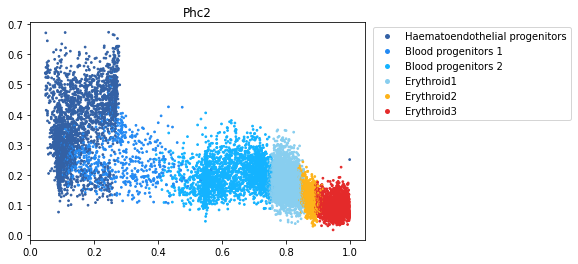

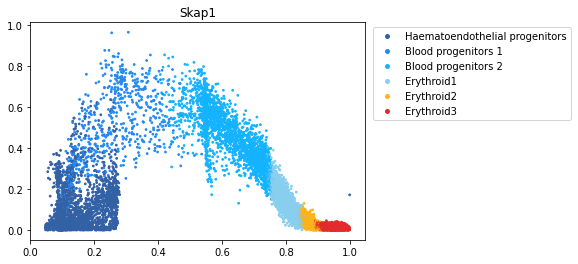

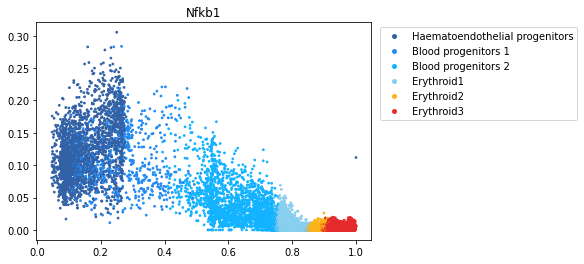

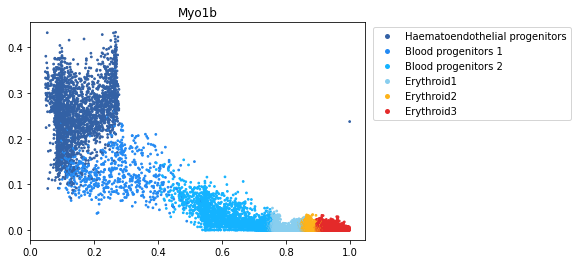

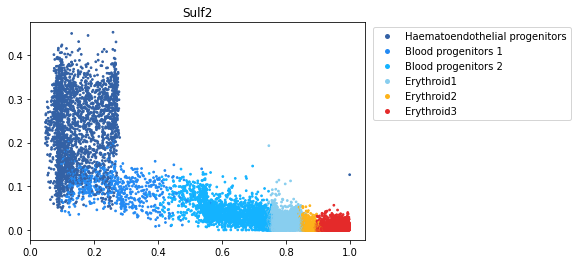

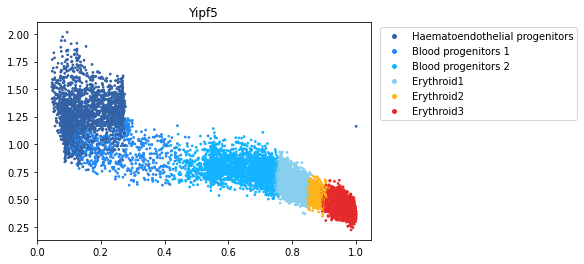

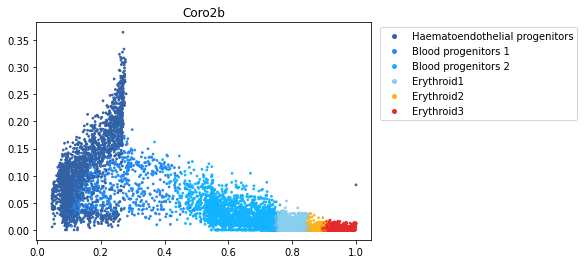

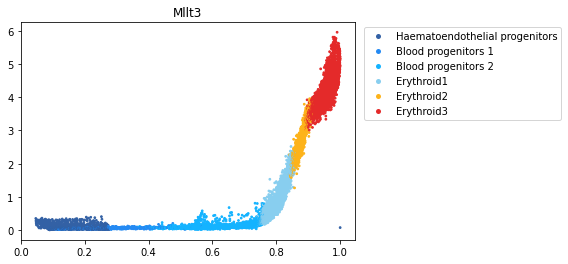

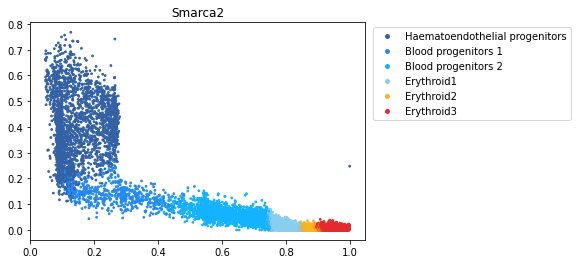

In [9]:
# radis 1

from colormap import *
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}


#colors=None


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/gene_pseudotime/'
save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth_pz.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)


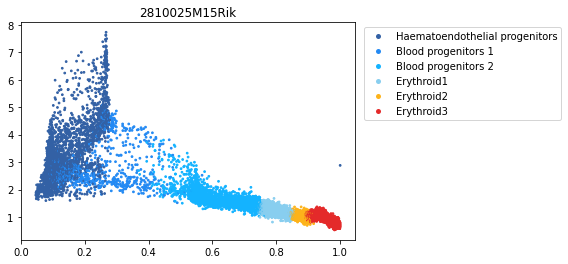

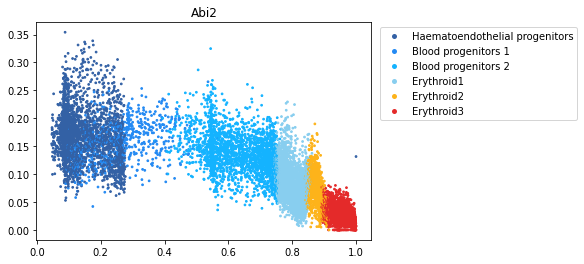

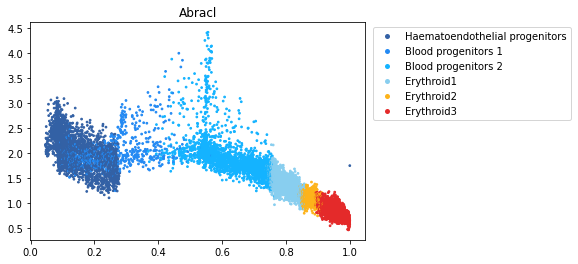

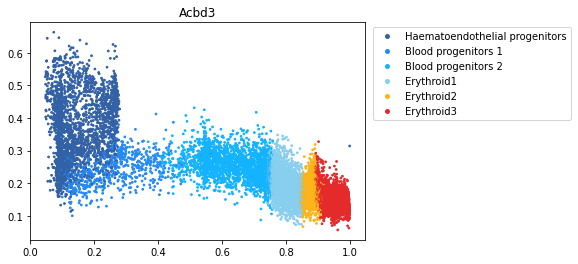

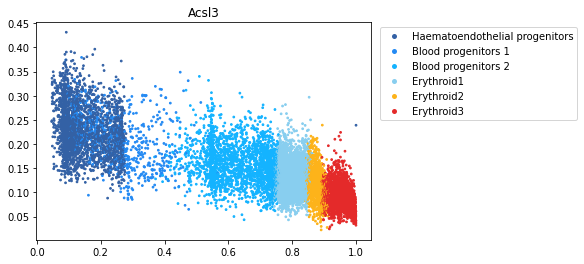

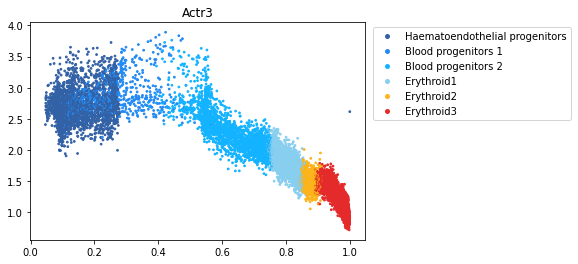

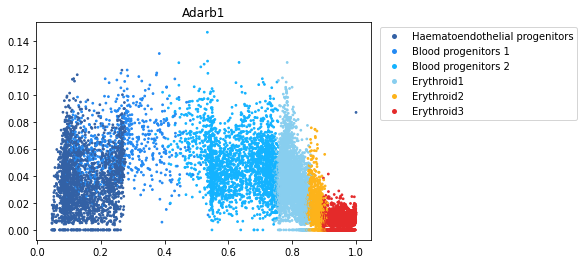

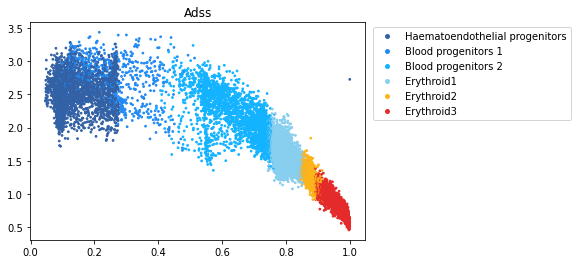

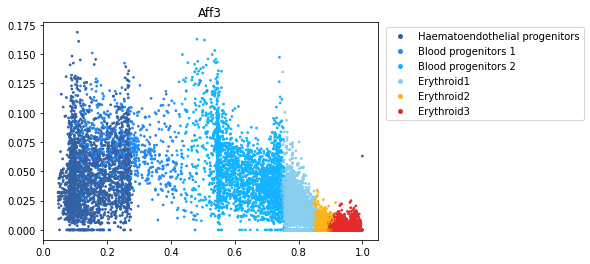

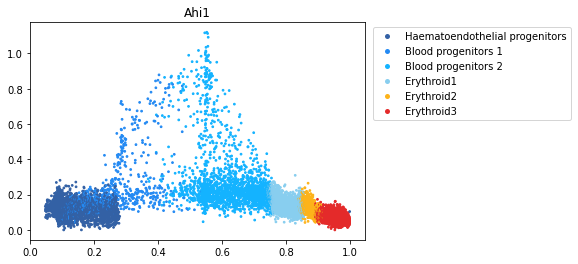

In [225]:
gene_list=load_cellDancer.gene_name.drop_duplicates()[0:10]
gene_list_pseudotime(gene_list,load_cellDancer,colors,save_path=save_path)

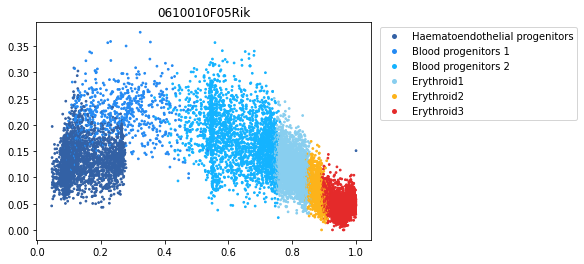

In [18]:
from colormap import *
color_list=solarExtra02.copy()
colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}
gene_list=['0610010F05Rik']
gene_list_pseudotime(gene_list,load_cellDancer,colors)

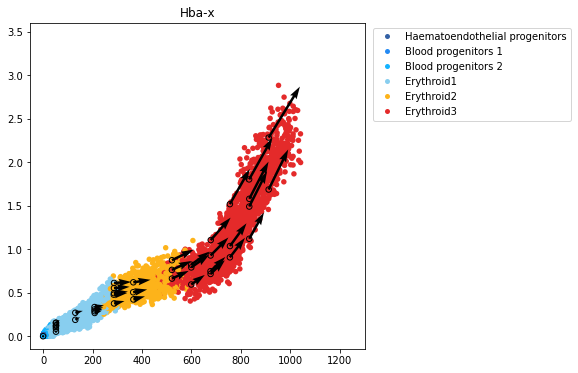

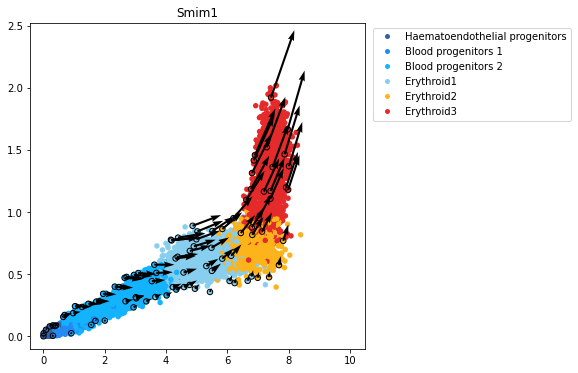

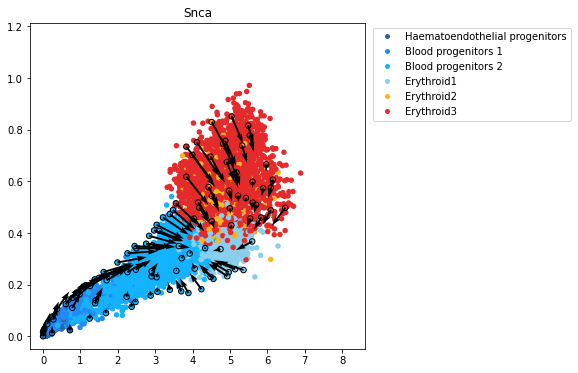

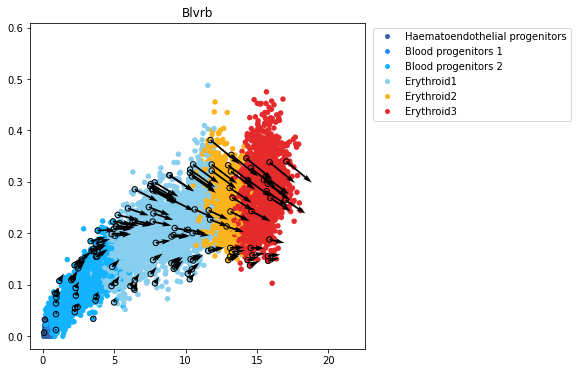

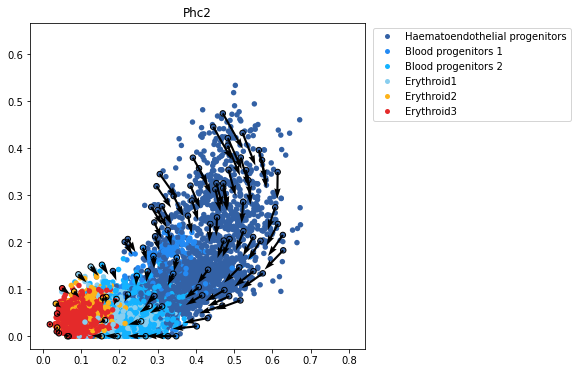

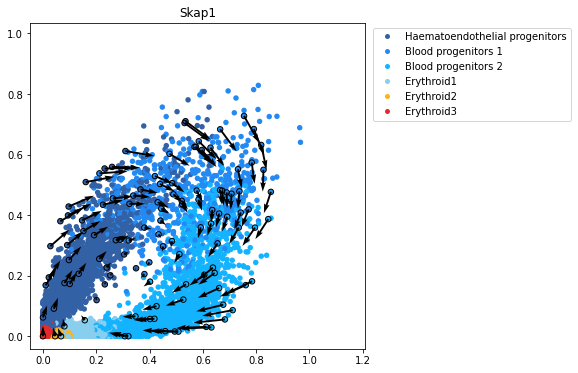

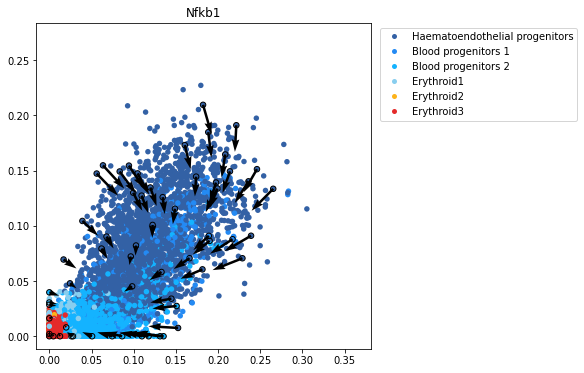

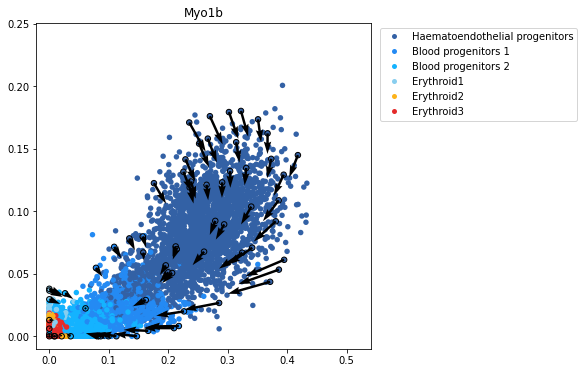

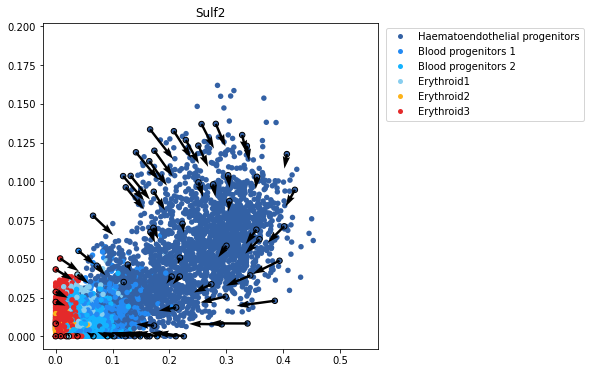

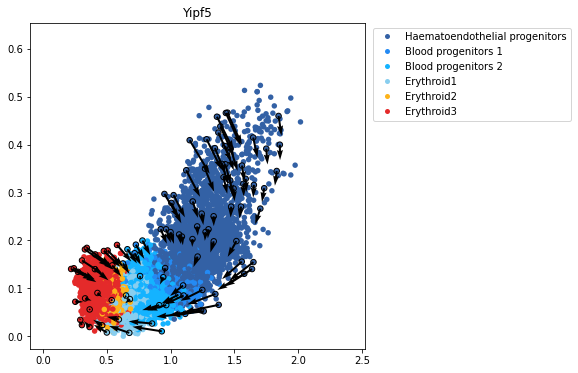

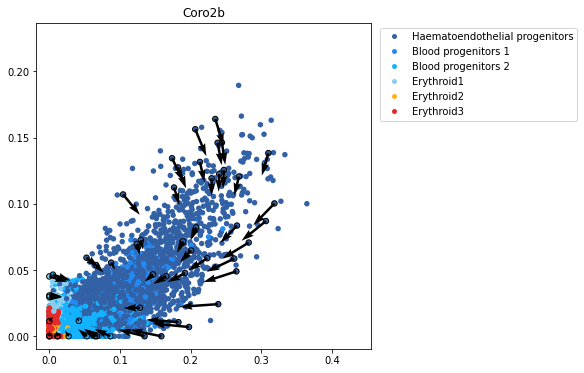

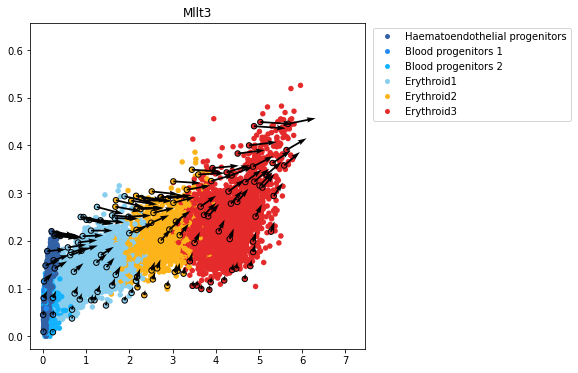

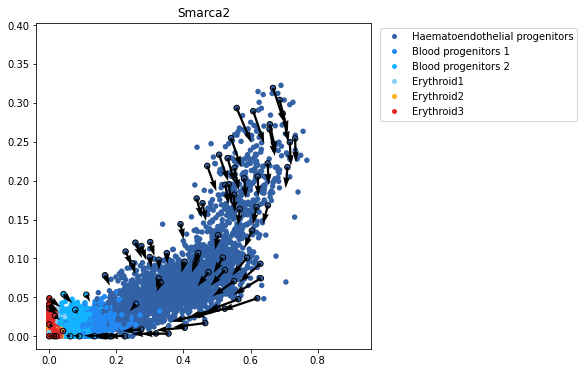

In [11]:
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
for gene in gene_list:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=onegene.clusters,point_size=30,alpha_inside=1)

In [15]:
# radis 1, heatmap
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}

import seaborn as sns


#plt.scatter(merged.time,[1]*len(merged.time),c=merged.clusters.map(colors),alpha=0.01)
cluster_time_sort=pd.DataFrame(merged.clusters.map(ids))

cluster_time_sort.index=merged['index']
cluster_time_sort.T.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort.csv')

In [154]:
color_list

['#3361A5', '#248AF3', '#14B3FF', '#88CEEF', '#FDB31A', '#E42A2A']

In [16]:
cluster_time_sort.T

index     3592   3442   5365   1466   5435   5708   5271   8794   1942   \
clusters      0      0      0      0      0      0      0      0      0   

index     5257   ...  3930   11886  7982   11435  11122  3784   11473  11604  \
clusters      0  ...      5      5      5      5      5      5      5      5   

index     12093  6844   
clusters      5      0  

[1 rows x 12329 columns]

In [21]:
# traj CLUSTER 1 & 2
traj_cluster = pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/cluster_1_and_2/pseudo_time_Gastrulation_cluster1_cluster2_pz.csv')
traj_cluster_0 = traj_cluster[traj_cluster.traj_cluster==0].index # more cells
traj_cluster_1 = traj_cluster[traj_cluster.traj_cluster==1].index # less cells

cluster_time_sort_cluster_0=cluster_time_sort[cluster_time_sort.index.isin(traj_cluster_0)].T
cluster_time_sort_cluster_1=cluster_time_sort[cluster_time_sort.index.isin(traj_cluster_1)].T
cluster_time_sort_cluster_0.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster1_and_2/cluster_time_sort_cluster_0.csv')
cluster_time_sort_cluster_1.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster1_and_2/cluster_time_sort_cluster_1.csv')



In [33]:
cluster_time_sort_cluster_0

index     10576  2891   6134   9437   3606   6425   5520   1986   6882   \
clusters      0      0      0      0      0      0      0      0      0   

index     7233   ...  3930   11886  7982   11435  11122  3784   11473  11604  \
clusters      0  ...      5      5      5      5      5      5      5      5   

index     12093  6844   
clusters      5      0  

[1 rows x 10321 columns]

In [34]:
cluster_time_sort_cluster_1

index     3592  3442  5365  1466  5435  5708  5271  8794  1942  5257  ...  \
clusters     0     0     0     0     0     0     0     0     0     0  ...   

index     3759  6036  4165  8171  7732  2822  185   3897  7102  7395  
clusters     0     0     0     0     0     0     0     0     0     0  

[1 rows x 2008 columns]

In [155]:
from colormap import *
color_list=solarExtra02.copy()
colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}
colors

{'Haematoendothelial progenitors': '#3361A5',
 'Blood progenitors 1': '#248AF3',
 'Blood progenitors 2': '#14B3FF',
 'Erythroid1': '#88CEEF',
 'Erythroid2': '#FDB31A',
 'Erythroid3': '#E42A2A'}

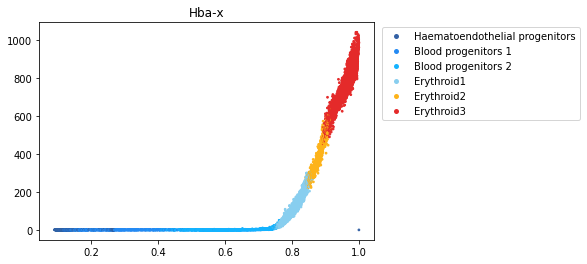

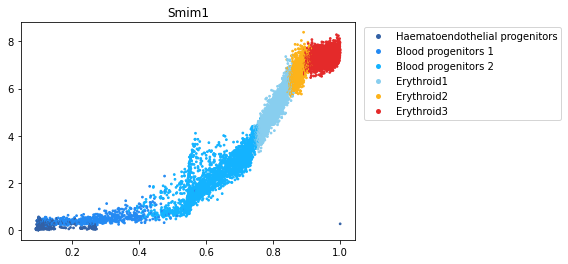

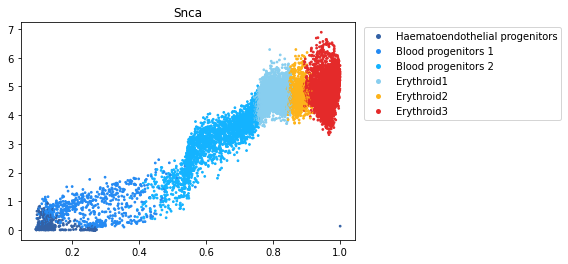

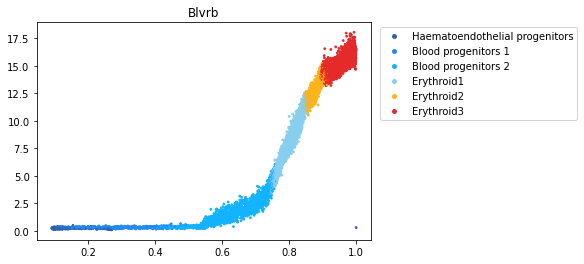

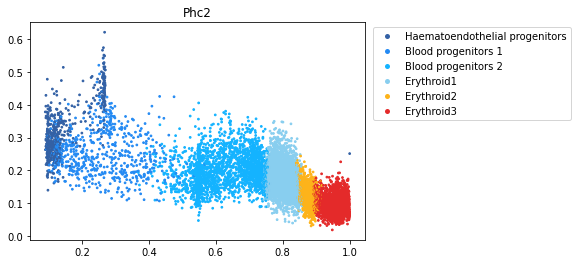

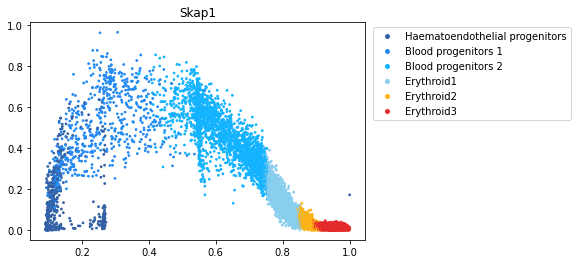

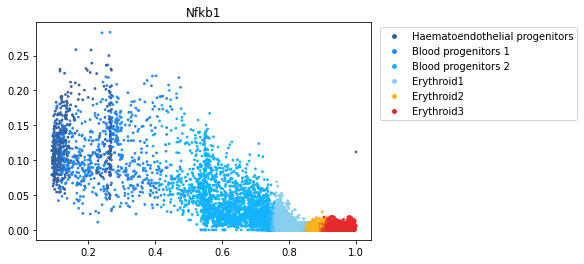

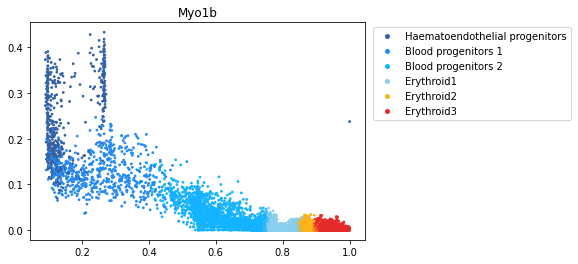

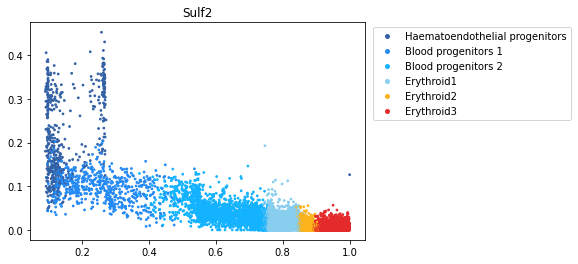

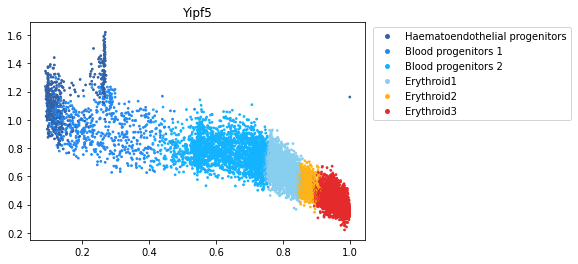

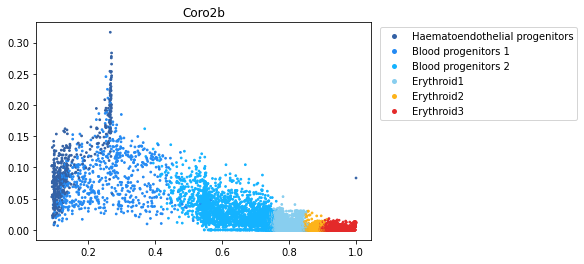

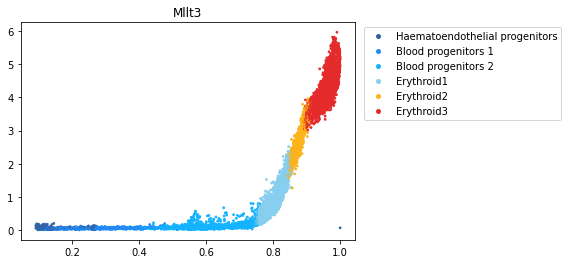

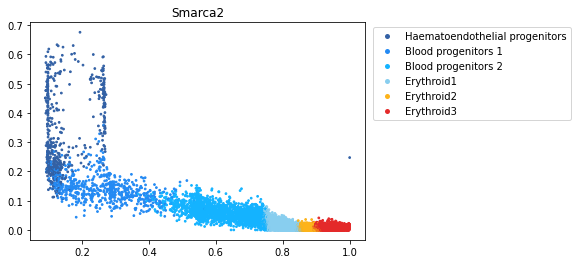

In [32]:
from colormap import *
load_cellDancer_cluster0=load_cellDancer[load_cellDancer.cellIndex.isin(traj_cluster_0)]
color_list=solarExtra02.copy()
colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}
gene_list=['0610010F05Rik']
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']


gene_list_pseudotime(gene_list,load_cellDancer_cluster0,colors)

In [36]:
#### heatmap
alpha_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')

In [37]:
alpha_heatmap_raw_cell_sort_by_time=alpha_heatmap_raw.T[cluster_time_sort_cluster_0.T.index]
alpha_heatmap_raw_cell_sort_by_time.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster1_and_2/cluster_time_sort_cluster_0_alpha_allgene.csv')
alpha_heatmap_raw_cell_sort_by_time

cellIndex         10576     2891      6134      9437      3606      6425   \
gene_name                                                                   
0610010F05Rik  0.064423  0.061741  0.066051  0.059455  0.061923  0.060694   
1110038B12Rik  0.006547  0.006336  0.007737  0.006629  0.005740  0.005931   
1500009L16Rik  0.013317  0.011435  0.008485  0.010440  0.011821  0.012658   
1700017B05Rik  0.024513  0.027359  0.020509  0.024405  0.022558  0.026417   
1700027J19Rik  0.001712  0.000630  0.000667  0.001530  0.000562  0.001684   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.004491  0.003235  0.004614  0.003061  0.003169  0.002299   
Zscan21        0.008388  0.007300  0.008044  0.006996  0.006303  0.006500   
Zscan26        0.220546  0.228238  0.189661  0.212946  0.212469  0.202999   
Zswim6         0.441338  0.364209  0.412987  0.374902  0.389937  0.439304   
Zswim7         0.080793  0.080529  0.091706  0.068987  0.064121  0.077951   

cellIndex         5520      1986      6882      7233   ...     3930   \
gene_name                                              ...             
0610010F05Rik  0.064649  0.060551  0.063034  0.061323  ...  0.069832   
1110038B12Rik  0.006579  0.006249  0.006345  0.006154  ...  0.010485   
1500009L16Rik  0.010712  0.010059  0.007439  0.007123  ...  0.016163   
1700017B05Rik  0.025524  0.020862  0.020385  0.023260  ...  0.026488   
1700027J19Rik  0.000816  0.001379  0.000552  0.001585  ...  0.001667   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.003082  0.001697  0.009784  0.002827  ...  0.010123   
Zscan21        0.006222  0.007941  0.012108  0.009110  ...  0.014680   
Zscan26        0.208810  0.222866  0.195264  0.200689  ...  0.150229   
Zswim6         0.397018  0.413963  0.230981  0.409622  ...  0.158793   
Zswim7         0.071618  0.074690  0.054797  0.069976  ...  0.051346   

cellIndex         11886     7982      11435     11122     3784      11473  \
gene_name                                                                   
0610010F05Rik  0.069139  0.068227  0.066995  0.069708  0.067883  0.068667   
1110038B12Rik  0.009982  0.010021  0.011478  0.010103  0.011403  0.011469   
1500009L16Rik  0.016310  0.016233  0.015715  0.016039  0.016508  0.015944   
1700017B05Rik  0.028099  0.026755  0.026882  0.027544  0.027087  0.026350   
1700027J19Rik  0.001667  0.001667  0.001590  0.001594  0.001622  0.001667   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.014996  0.007882  0.009446  0.007678  0.009276  0.007502   
Zscan21        0.014290  0.013818  0.011780  0.013161  0.013250  0.013335   
Zscan26        0.157446  0.141883  0.143362  0.153794  0.148197  0.142779   
Zswim6         0.178788  0.162939  0.153727  0.172019  0.160949  0.155760   
Zswim7         0.035397  0.043834  0.047765  0.047134  0.042046  0.047941   

cellIndex         11604     12093     6844   
gene_name                                    
0610010F05Rik  0.067688  0.066114  0.066830  
1110038B12Rik  0.011892  0.011847  0.008014  
1500009L16Rik  0.016169  0.016120  0.009752  
1700017B05Rik  0.025616  0.026670  0.021582  
1700027J19Rik  0.001655  0.001632  0.000579  
...                 ...       ...       ...  
Zrsr2          0.006106  0.008443  0.003886  
Zscan21        0.012370  0.012547  0.013390  
Zscan26        0.146200  0.154254  0.199412  
Zswim6         0.164638  0.151537  0.243455  
Zswim7         0.048149  0.051721  0.042936  

[2000 rows x 10321 columns]

In [38]:
s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')
s0_heatmap_raw_cell_sort_by_time=s0_heatmap_raw.T[cluster_time_sort_cluster_0.T.index]
s0_heatmap_raw_cell_sort_by_time.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster1_and_2/cluster_time_sort_cluster_0_s0_allgene.csv')

In [39]:
s0_heatmap_raw_cell_sort_by_time

cellIndex         10576     2891      6134      9437      3606      6425   \
gene_name                                                                   
0610010F05Rik  0.096700  0.128834  0.111648  0.131514  0.138191  0.131783   
1110038B12Rik  1.069637  1.020362  0.962238  1.035347  1.146088  1.177948   
1500009L16Rik  0.617392  0.653615  0.600975  0.698245  0.651468  0.727481   
1700017B05Rik  0.163889  0.160706  0.199105  0.182902  0.173908  0.158638   
1700027J19Rik  0.572426  0.615170  0.579657  0.531567  0.688092  0.469003   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.898091  0.855490  0.986772  0.836006  0.780993  0.865232   
Zscan21        0.628727  0.653286  0.635191  0.631017  0.608534  0.693389   
Zscan26        0.024924  0.030029  0.045135  0.024386  0.053803  0.033965   
Zswim6         0.187288  0.134605  0.237754  0.160095  0.160521  0.159476   
Zswim7         0.322961  0.292389  0.304006  0.325880  0.423799  0.253494   

cellIndex         5520      1986      6882      7233   ...     3930   \
gene_name                                              ...             
0610010F05Rik  0.118341  0.200729  0.125399  0.134992  ...  0.044262   
1110038B12Rik  0.971857  1.134744  1.226324  1.140521  ...  0.403637   
1500009L16Rik  0.686826  0.603021  0.709392  0.747171  ...  0.034380   
1700017B05Rik  0.172843  0.207407  0.294705  0.193415  ...  0.062164   
1700027J19Rik  0.454368  0.749403  0.699358  0.568552  ...  0.000000   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.775137  1.019292  1.068207  0.875463  ...  0.193013   
Zscan21        0.629800  0.623212  0.375719  0.599991  ...  0.123622   
Zscan26        0.029200  0.015339  0.022302  0.020566  ...  0.000000   
Zswim6         0.130081  0.155262  0.085939  0.185320  ...  0.000000   
Zswim7         0.329072  0.364524  0.501406  0.286588  ...  0.246866   

cellIndex         11886     7982      11435     11122     3784      11473  \
gene_name                                                                   
0610010F05Rik  0.029431  0.050349  0.054333  0.055289  0.051791  0.047917   
1110038B12Rik  0.461725  0.457142  0.434558  0.447485  0.427837  0.439269   
1500009L16Rik  0.026434  0.030603  0.059106  0.041182  0.015751  0.046427   
1700017B05Rik  0.027988  0.056373  0.053646  0.039584  0.049254  0.065170   
1700027J19Rik  0.000000  0.000000  0.031534  0.029881  0.018468  0.000000   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.176189  0.191772  0.230593  0.209804  0.193006  0.227903   
Zscan21        0.131430  0.129134  0.103691  0.113425  0.122173  0.149353   
Zscan26        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim7         0.197860  0.228986  0.267824  0.212243  0.237899  0.245249   

cellIndex         11604     12093     6844   
gene_name                                    
0610010F05Rik  0.046612  0.058128  0.150968  
1110038B12Rik  0.396254  0.386269  1.073956  
1500009L16Rik  0.034097  0.036737  0.761277  
1700017B05Rik  0.081382  0.058216  0.216169  
1700027J19Rik  0.004997  0.014156  0.668763  
...                 ...       ...       ...  
Zrsr2          0.200933  0.193190  0.906041  
Zscan21        0.116318  0.132394  0.324084  
Zscan26        0.000000  0.000000  0.057876  
Zswim6         0.000000  0.000000  0.074537  
Zswim7         0.232347  0.224996  0.590614  

[2000 rows x 10321 columns]

In [40]:
heatmap_bar_cluster_0_cluster1=pd.DataFrame(pd.merge(merged,traj_cluster,left_on='index', right_on='index')['traj_cluster']).T
heatmap_bar_cluster_0_cluster1.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster1_and_2/heatmap_bar_cluster_0_cluster1.csv')

In [41]:
heatmap_bar_cluster_0_cluster1

0      1      2      3      4      5      6      7      8      \
traj_cluster      1      1      1      1      1      1      1      1      1   

              9      ...  12319  12320  12321  12322  12323  12324  12325  \
traj_cluster      1  ...      0      0      0      0      0      0      0   

              12326  12327  12328  
traj_cluster      0      0      0  

[1 rows x 12329 columns]

In [231]:
# Non-para
# https://pythonhosted.org/PyQt-Fit/NonParam_tut.html
# https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from utilities import non_para_kernel



cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth_pz.csv')
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','time']

# radis 1, heatmap
#onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
#merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future
#cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth.csv')


s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

s0_heatmap_raw
s0_merged=pd.merge(cell_time_time_sort,s0_heatmap_raw,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future

In [97]:
s0_merged

index      time  0610010F05Rik  1110038B12Rik  1500009L16Rik  \
0       3592  0.046515       0.045757       0.755265       0.517064   
1       3442  0.047470       0.080250       0.741811       0.688037   
2       5365  0.047699       0.115107       0.668775       0.593461   
3       1466  0.047786       0.137819       0.639425       0.589416   
4       5435  0.048017       0.116552       0.688695       0.543766   
...      ...       ...            ...            ...            ...   
12324   3784  0.999367       0.051791       0.427837       0.015751   
12325  11473  0.999785       0.047917       0.439269       0.046427   
12326  11604  0.999789       0.046612       0.396254       0.034097   
12327  12093  0.999826       0.058128       0.386269       0.036737   
12328   6844  1.000000       0.150968       1.073956       0.761277   

       1700017B05Rik  1700027J19Rik  1700037H04Rik  1810022K09Rik  \
0           0.227438       0.922967       0.382281       1.364491   
1           0.258093       0.855593       0.423024       1.368414   
2           0.263938       0.728814       0.425875       1.518204   
3           0.284990       0.774082       0.430224       1.360984   
4           0.254887       0.828682       0.450768       1.315259   
...              ...            ...            ...            ...   
12324       0.049254       0.018468       1.062508       0.898295   
12325       0.065170       0.000000       1.063562       0.975169   
12326       0.081382       0.004997       1.117103       0.839070   
12327       0.058216       0.014156       1.080593       0.909579   
12328       0.216169       0.668763       0.595283       1.397846   

       1810026B05Rik  ...     Zfpm1   Zmynd19    Zmynd8     Znrf1     Znrf3  \
0           0.187510  ...  0.148109  0.694457  0.349836  0.704492  0.020616   
1           0.220291  ...  0.157351  0.786802  0.298789  0.643703  0.014003   
2           0.281582  ...  0.110479  0.847195  0.270915  0.567095  0.051119   
3           0.271929  ...  0.132182  0.908192  0.273795  0.491161  0.060487   
4           0.244416  ...  0.146318  0.789276  0.265576  0.680683  0.031064   
...              ...  ...       ...       ...       ...       ...       ...   
12324       0.082108  ...  0.664185  0.313405  0.068925  0.131566  0.000000   
12325       0.104583  ...  0.620808  0.302924  0.100061  0.170091  0.005814   
12326       0.061199  ...  0.636390  0.299466  0.093487  0.105537  0.006916   
12327       0.081570  ...  0.611569  0.280441  0.086147  0.103024  0.006179   
12328       0.184090  ...  0.336956  0.804891  0.255053  0.311017  0.056688   

          Zrsr2   Zscan21   Zscan26    Zswim6    Zswim7  
0      1.399704  0.503637  0.056519  0.069720  0.368633  
1      1.342300  0.469649  0.051361  0.068521  0.480809  
2      1.375632  0.376475  0.049075  0.062892  0.412221  
3      1.269846  0.433855  0.041823  0.066696  0.386500  
4      1.391532  0.374823  0.052209  0.082408  0.363961  
...         ...       ...       ...       ...       ...  
12324  0.193006  0.122173  0.000000  0.000000  0.237899  
12325  0.227903  0.149353  0.000000  0.000000  0.245249  
12326  0.200933  0.116318  0.000000  0.000000  0.232347  
12327  0.193190  0.132394  0.000000  0.000000  0.224996  
12328  0.906041  0.324084  0.057876  0.074537  0.590614  

[12329 rows x 2002 columns]

In [242]:
s0_merged_part_gene=s0_merged.loc[:, s0_merged.columns[2:]]
s0_merged_part_time=s0_merged.loc[:, s0_merged.columns[0:2]]

In [241]:
s0_merged_part_gene

0610010F05Rik  1110038B12Rik  1500009L16Rik  1700017B05Rik  \
0           0.045757       0.755265       0.517064       0.227438   
1           0.080250       0.741811       0.688037       0.258093   
2           0.115107       0.668775       0.593461       0.263938   
3           0.137819       0.639425       0.589416       0.284990   
4           0.116552       0.688695       0.543766       0.254887   
...              ...            ...            ...            ...   
12324       0.051791       0.427837       0.015751       0.049254   
12325       0.047917       0.439269       0.046427       0.065170   
12326       0.046612       0.396254       0.034097       0.081382   
12327       0.058128       0.386269       0.036737       0.058216   
12328       0.150968       1.073956       0.761277       0.216169   

       1700027J19Rik  1700037H04Rik  1810022K09Rik  1810026B05Rik  \
0           0.922967       0.382281       1.364491       0.187510   
1           0.855593       0.423024       1.368414       0.220291   
2           0.728814       0.425875       1.518204       0.281582   
3           0.774082       0.430224       1.360984       0.271929   
4           0.828682       0.450768       1.315259       0.244416   
...              ...            ...            ...            ...   
12324       0.018468       1.062508       0.898295       0.082108   
12325       0.000000       1.063562       0.975169       0.104583   
12326       0.004997       1.117103       0.839070       0.061199   
12327       0.014156       1.080593       0.909579       0.081570   
12328       0.668763       0.595283       1.397846       0.184090   

       1810032O08Rik  2410003L11Rik  ...     Zfpm1   Zmynd19    Zmynd8  \
0           0.236766       0.009605  ...  0.148109  0.694457  0.349836   
1           0.226738       0.006524  ...  0.157351  0.786802  0.298789   
2           0.266112       0.005795  ...  0.110479  0.847195  0.270915   
3           0.251287       0.005996  ...  0.132182  0.908192  0.273795   
4           0.267378       0.006870  ...  0.146318  0.789276  0.265576   
...              ...            ...  ...       ...       ...       ...   
12324       0.194437       0.011387  ...  0.664185  0.313405  0.068925   
12325       0.181934       0.025429  ...  0.620808  0.302924  0.100061   
12326       0.166920       0.018454  ...  0.636390  0.299466  0.093487   
12327       0.168199       0.011480  ...  0.611569  0.280441  0.086147   
12328       0.277530       0.016561  ...  0.336956  0.804891  0.255053   

          Znrf1     Znrf3     Zrsr2   Zscan21   Zscan26    Zswim6    Zswim7  
0      0.704492  0.020616  1.399704  0.503637  0.056519  0.069720  0.368633  
1      0.643703  0.014003  1.342300  0.469649  0.051361  0.068521  0.480809  
2      0.567095  0.051119  1.375632  0.376475  0.049075  0.062892  0.412221  
3      0.491161  0.060487  1.269846  0.433855  0.041823  0.066696  0.386500  
4      0.680683  0.031064  1.391532  0.374823  0.052209  0.082408  0.363961  
...         ...       ...       ...       ...       ...       ...       ...  
12324  0.131566  0.000000  0.193006  0.122173  0.000000  0.000000  0.237899  
12325  0.170091  0.005814  0.227903  0.149353  0.000000  0.000000  0.245249  
12326  0.105537  0.006916  0.200933  0.116318  0.000000  0.000000  0.232347  
12327  0.103024  0.006179  0.193190  0.132394  0.000000  0.000000  0.224996  
12328  0.311017  0.056688  0.906041  0.324084  0.057876  0.074537  0.590614  

[12329 rows x 2000 columns]

In [48]:
s0_merged_part_time

index      time
0       3592  0.046515
1       3442  0.047470
2       5365  0.047699
3       1466  0.047786
4       5435  0.048017
...      ...       ...
12324   3784  0.999367
12325  11473  0.999785
12326  11604  0.999789
12327  12093  0.999826
12328   6844  1.000000

[12329 rows x 2 columns]

In [37]:
def _non_para_kernel_t2(X,Y):
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    from statsmodels.nonparametric.kernel_regression import KernelReg
    import matplotlib.pyplot as plt

    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])
    plt.figure()
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.scatter(X,Y)
    ax.plot(X, estimator, '-', alpha=0.8, color='red')
    plt.show()
    return(estimator,kde.r_squared())

In [11]:
X=merged.time
Y=merged.s0

In [14]:
from utilities import non_para_kernel

estimator,r_square=non_para_kernel(X,Y)

0        1.799330
1        1.895046
2        1.847383
3        1.882600
4        1.666470
           ...   
12324    0.676877
12325    0.691607
12326    0.746501
12327    0.737799
12328    2.881572
Name: s0, Length: 12329, dtype: float64

In [36]:
s0_merged_part_gene.columns[500:560]

Index(['Elovl6', 'Emb', 'Emc4', 'Emcn', 'Emilin2', 'Eml4', 'Emx2', 'Enah',
       'Eng', 'Eno1', 'Eno1b', 'Epb41l2', 'Epb41l3', 'Epb41l4aos', 'Epb42',
       'Epc2', 'Epha4', 'Epha5', 'Epn2', 'Epor', 'Eps8', 'Erg', 'Erg28', 'Erh',
       'Erp44', 'Errfi1', 'Esam', 'Esco1', 'Etl4', 'Ets1', 'Ets2', 'Etv2',
       'Etv6', 'Evi5', 'Evl', 'Exoc3l', 'Exoc3l2', 'Ezh2', 'Ezr', 'F10',
       'F11r', 'F2r', 'Fabp5', 'Fads1', 'Faf2', 'Faim', 'Fam107b', 'Fam111a',
       'Fam135a', 'Fam136a', 'Fam162a', 'Fam168a', 'Fam171a1', 'Fam171a2',
       'Fam19a5', 'Fam208b', 'Fam210b', 'Fam213a', 'Fam216a', 'Fam222b'],
      dtype='object')

In [ ]:
####################################
# parallel run pseudotime r_square #
####################################

# thread
import time
time_start=time.time()
print('time_start'+str(time_start))


from joblib import Parallel, delayed
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
# run parallel
result = Parallel(n_jobs=20, backend="loky")(
    delayed(_non_para_kernel_t2)(s0_merged_part_time.time,s0_merged_part_gene[gene_list[gene_index]])
    for gene_index in range(0,len(gene_list)))

time_end=time.time()
print('time spent: ',(time_end-time_start)/60,' min')   
# # combine result
# for i,result_i in enumerate(result):
#     # print(i)

#     np_s0=result_i[0]
#     np_dMatrix=result_i[1]
#     # print(np_s0.shape)
#     # print(np_dMatrix.shape)
#     if i == 0:
#         np_s0_all = np_s0
#         np_dMatrix_all = np_dMatrix
#     else:
#         np_s0_all = np.vstack((np_s0_all, np_s0))
#         np_dMatrix_all = np.vstack((np_dMatrix_all, np_dMatrix))


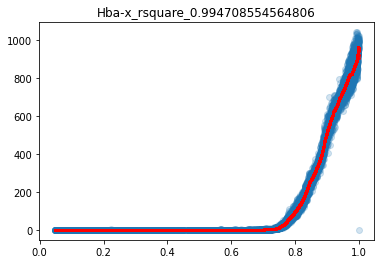

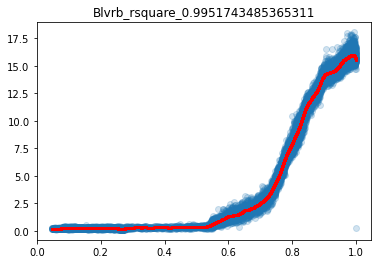

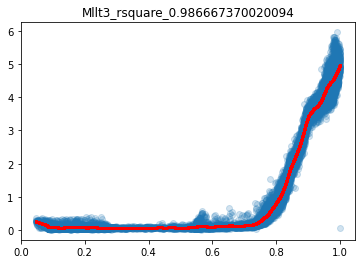

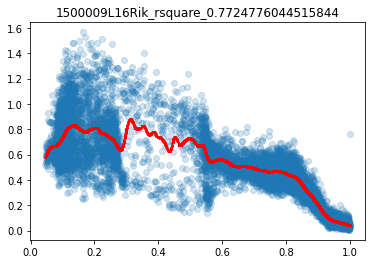

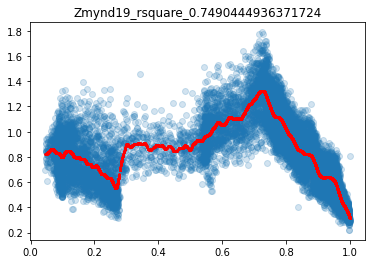

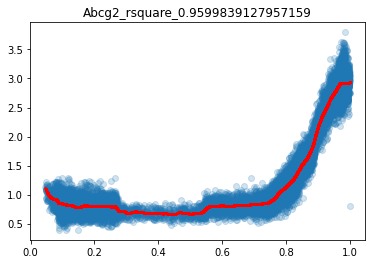

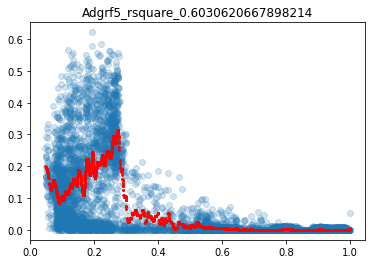

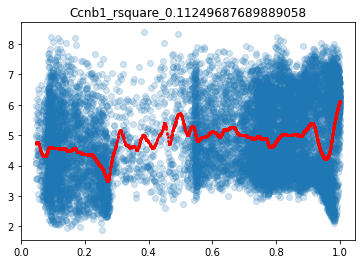

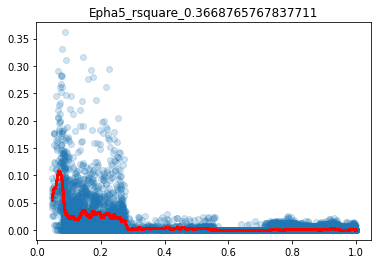

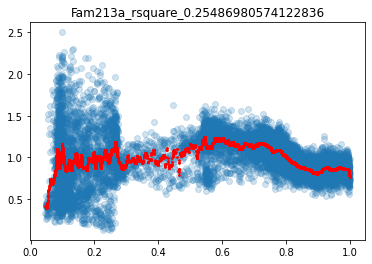

In [56]:
####################################
# PLOT: parallel run pseudotime r_square #
####################################
for idx in range(len(result)):
    gene_name=gene_list[idx]
    plt.figure()
    plt.scatter(s0_merged_part_time.time,s0_merged_part_gene[gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time.time,result[idx][0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(result[idx][1]))

In [11]:
def _non_para_kernel_t3(X,Y,down_sample_idx): # this version has downsampling section
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    from statsmodels.nonparametric.kernel_regression import KernelReg
    import matplotlib.pyplot as plt
    Y=Y[Y.index.isin(down_sample_idx)]
    X=X[X.index.isin(down_sample_idx)]
    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])

#     plt.figure()
#     fig, ax = plt.subplots(figsize=(10,5))
#     ax.scatter(X,Y)
#     ax.plot(X, estimator, '-', alpha=0.8, color='red')
#     plt.show()
    
    return(estimator,kde.r_squared())

# downsample
from sampling import sampling_embedding
embedding=load_cellDancer.loc[load_cellDancer.gene_name==load_cellDancer.gene_name[0]][['embedding1','embedding2']]
para='neighbors'
target_amount=0
step=40
step_i=step
step_j=step
idx_downSampling_embedding = sampling_embedding(embedding,
            para=para,
            target_amount=target_amount,
            step_i=step_i,
            step_j=step_j
            )
len(idx_downSampling_embedding)

# PARALLEL thread
import time
time_start=time.time()
print('time_start'+str(time_start))


from joblib import Parallel, delayed
#gene_list=['Hba-x','Blvrb','Mllt3','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
gene_list=s0_merged_part_gene.columns
# run parallel
result = Parallel(n_jobs=20, backend="loky")(
    delayed(_non_para_kernel_t3)(s0_merged_part_time.time,s0_merged_part_gene[gene_list[gene_index]],idx_downSampling_embedding)
    for gene_index in range(0,len(gene_list)))

time_end=time.time()
print('time spent: ',(time_end-time_start)/60,' min')   

time_start1649287733.209522
time spent:  1.8100069165229797  min


In [12]:
# combine result
for i,result_i in enumerate(result):

    r_square=result_i[1]
    non_para_fit=result_i[0]
    #print(r_square)
    if i == 0:
        r_square_list = r_square
        non_para_fit_list = np.transpose(non_para_fit)
    else:
        r_square_list = np.vstack((r_square_list, r_square))
        non_para_fit_list = np.vstack((non_para_fit_list, np.transpose(non_para_fit)[0]))
r_square=pd.DataFrame({'gene_name':gene_list,'r_square':np.transpose(r_square_list)[0]})

In [13]:
non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat.columns=idx_downSampling_embedding
non_para_fit_heat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_heat.csv')

In [14]:
non_para_fit_heat

61        193       293       302       306       326    \
0610010F05Rik  0.077408  0.107596  0.113103  0.113645  0.113967  0.114780   
1110038B12Rik  0.820499  0.949141  0.970468  0.972520  0.973735  0.976783   
1500009L16Rik  0.554822  0.634227  0.651108  0.652859  0.653909  0.656587   
1700017B05Rik  0.221035  0.218235  0.215720  0.215430  0.215254  0.214798   
1700027J19Rik  0.668740  0.683474  0.688335  0.688879  0.689209  0.690062   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          1.151401  1.037500  1.018060  1.016147  1.015009  1.012139   
Zscan21        0.448813  0.431367  0.427415  0.426998  0.426748  0.426107   
Zscan26        0.044587  0.044029  0.043884  0.043868  0.043858  0.043834   
Zswim6         0.110594  0.109775  0.109620  0.109605  0.109595  0.109572   
Zswim7         0.465648  0.467236  0.467664  0.467711  0.467739  0.467810   

                  376       444       516       589    ...     11683  \
0610010F05Rik  0.116325  0.117971  0.119795  0.122086  ...  0.047054   
1110038B12Rik  0.982506  0.988488  0.994952  1.002760  ...  0.607512   
1500009L16Rik  0.661800  0.667547  0.674169  0.682888  ...  0.040767   
1700017B05Rik  0.213883  0.212837  0.211594  0.209920  ...  0.072461   
1700027J19Rik  0.691777  0.693749  0.696130  0.699448  ...  0.004134   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          1.006684  1.000873  0.994441  0.986403  ...  0.217949   
Zscan21        0.424850  0.423450  0.421817  0.419632  ...  0.165313   
Zscan26        0.043786  0.043731  0.043666  0.043577  ...  0.006642   
Zswim6         0.109527  0.109479  0.109426  0.109358  ...  0.003804   
Zswim7         0.467952  0.468113  0.468302  0.468559  ...  0.238416   

                  11751     11851     11959     12008     12021     12051  \
0610010F05Rik  0.047583  0.048506  0.049642  0.050335  0.050584  0.051128   
1110038B12Rik  0.602029  0.592018  0.578890  0.570363  0.567197  0.560061   
1500009L16Rik  0.038413  0.034661  0.030554  0.028260  0.027470  0.025797   
1700017B05Rik  0.071675  0.070471  0.069242  0.068610  0.068403  0.067985   
1700027J19Rik  0.003786  0.003247  0.002681  0.002377  0.002274  0.002061   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.216545  0.214176  0.211380  0.209719  0.209130  0.207851   
Zscan21        0.165277  0.165209  0.165120  0.165062  0.165040  0.164991   
Zscan26        0.006480  0.006208  0.005885  0.005693  0.005624  0.005475   
Zswim6         0.003482  0.002940  0.002301  0.001920  0.001784  0.001490   
Zswim7         0.238134  0.237651  0.237068  0.236714  0.236587  0.236308   

                  12091     12093     12237  
0610010F05Rik  0.051641  0.051682  0.052815  
1110038B12Rik  0.553033  0.552451  0.535666  
1500009L16Rik  0.024278  0.024157  0.020974  
1700017B05Rik  0.067634  0.067607  0.066976  
1700027J19Rik  0.001872  0.001857  0.001478  
...                 ...       ...       ...  
Zrsr2          0.206655  0.206559  0.203934  
Zscan21        0.164943  0.164939  0.164824  
Zscan26        0.005335  0.005324  0.005012  
Zswim6         0.001212  0.001190  0.000574  
Zswim7         0.236042  0.236020  0.235419  

[2000 rows x 243 columns]

In [15]:
non_para_list=pd.DataFrame(non_para_fit_list)
non_para_list['combined']=non_para_list.values.tolist()
r_square
r_square_non_para_list=pd.concat([r_square,non_para_list['combined']],axis=1)
r_square_non_para_list_sort=r_square_non_para_list.sort_values(by=['r_square'], axis=0, ascending=False)
r_square_non_para_list_sort

gene_name  r_square                                           combined
741      Hba-x  0.996257  [0.8032936530801182, 0.4557207175458263, 0.447...
187      Blvrb  0.996017  [0.1955983991630319, 0.23166512742613166, 0.23...
74        Alad  0.995838  [1.3546402767402812, 1.3542046522714728, 1.357...
742    Hbb-bh1  0.994903  [1.3879328087067244, 1.043674962292781, 1.0548...
767       Hmbs  0.994833  [1.009059876399778, 1.065650244748063, 1.06605...
...        ...       ...                                                ...
253      Ccnb1  0.048960  [4.283500638852375, 4.29742803039138, 4.300814...
729       Gzmf  0.047124  [-0.09442811849983854, -0.07165826921926105, -...
1667      Spp1  0.045545  [-0.08745786974060964, -0.06387233415356973, -...
730       Gzmg  0.043657  [-0.04608054072538447, -0.03423663416567855, -...
642       Gas2  0.000653  [0.060427497647641826, 0.060464613580013565, 0...

[2000 rows x 3 columns]

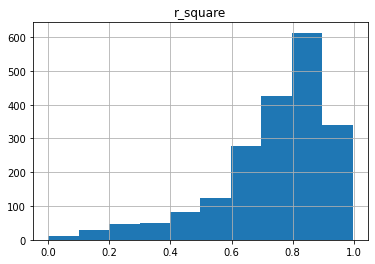

In [16]:
r_square_non_para_list.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(gene_list_story)]
point_eight_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_eight=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_eight.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

In [17]:
non_para_fit_heat_point_eight_all_cell=s0_merged_part_gene[point_eight_rsquare_gene_name].T
non_para_fit_heat_point_eight_all_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat_all_cell.csv')



In [235]:
non_para_fit_heat_point_eight

0         1         2         3         4         5    \
1110038B12Rik  0.759609  0.944433  0.946236  0.960976  0.966503  0.968185   
1500009L16Rik  0.628904  0.644041  0.644278  0.646819  0.648096  0.648525   
1700027J19Rik  0.786726  0.699481  0.699104  0.696232  0.695251  0.694962   
1700037H04Rik  0.479880  0.593273  0.594648  0.606237  0.610726  0.612107   
2410004B18Rik  1.972238  1.768837  1.767941  1.761262  1.759047  1.758404   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         1.709859  1.615769  1.615032  1.608902  1.606540  1.605813   
Zfp711         0.244127  0.285634  0.285974  0.288817  0.289916  0.290256   
Zfp948         0.186091  0.160006  0.159834  0.158463  0.157964  0.157813   
Znrf1          0.542939  0.463485  0.462877  0.457787  0.455807  0.455195   
Zrsr2          1.286328  1.023265  1.021718  1.009542  1.005174  1.003864   

                    6         7         8         9    ...       231  \
1110038B12Rik  0.988515  0.996964  1.003220  1.006290  ...  0.603248   
1500009L16Rik  0.655469  0.659488  0.662975  0.664860  ...  0.058753   
1700027J19Rik  0.691873  0.690823  0.690148  0.689852  ...  0.012088   
1700037H04Rik  0.629203  0.636446  0.641818  0.644449  ...  1.299316   
2410004B18Rik  1.751748  1.749597  1.748243  1.747654  ...  0.741930   
...                 ...       ...       ...       ...  ...       ...   
Zfp428         1.596593  1.592468  1.589273  1.587656  ...  0.179392   
Zfp711         0.294576  0.296524  0.298039  0.298809  ...  0.015787   
Zfp948         0.156012  0.155262  0.154700  0.154422  ...  0.047370   
Znrf1          0.447364  0.443824  0.441074  0.439681  ...  0.134914   
Zrsr2          0.988660  0.982645  0.978293  0.976187  ...  0.225003   

                    232       233       234       235       236       237  \
1110038B12Rik  0.598577  0.592356  0.574709  0.560226  0.556010  0.545957   
1500009L16Rik  0.057839  0.056690  0.053735  0.051541  0.050929  0.049510   
1700027J19Rik  0.012045  0.011989  0.011840  0.011724  0.011692  0.011616   
1700037H04Rik  1.296972  1.293909  1.285321  1.278133  1.275989  1.270757   
2410004B18Rik  0.735565  0.727793  0.709139  0.696647  0.693389  0.686213   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         0.177492  0.175137  0.169275  0.165099  0.163963  0.161374   
Zfp711         0.015782  0.015777  0.015765  0.015756  0.015753  0.015745   
Zfp948         0.046433  0.045241  0.042156  0.039903  0.039289  0.037891   
Znrf1          0.135298  0.135821  0.137360  0.138664  0.139049  0.139978   
Zrsr2          0.225025  0.225063  0.225215  0.225377  0.225430  0.225562   

                    238       239       240  
1110038B12Rik  0.535435  0.531694  0.513594  
1500009L16Rik  0.048070  0.047567  0.045182  
1700027J19Rik  0.011540  0.011513  0.011390  
1700037H04Rik  1.265070  1.262990  1.252445  
2410004B18Rik  0.679501  0.677293  0.667773  
...                 ...       ...       ...  
Zfp428         0.158817  0.157940  0.153895  
Zfp711         0.015735  0.015731  0.015707  
Zfp948         0.036525  0.036061  0.033964  
Znrf1          0.140967  0.141322  0.143080  
Zrsr2          0.225713  0.225769  0.226060  

[1049 rows x 241 columns]

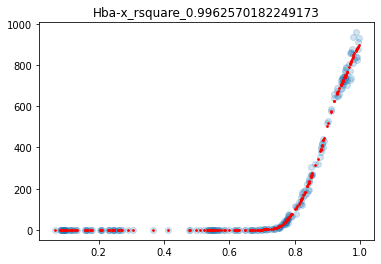

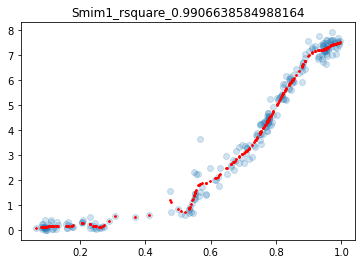

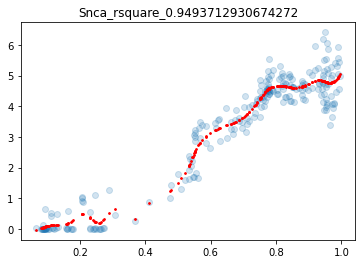

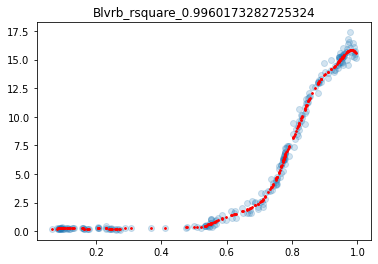

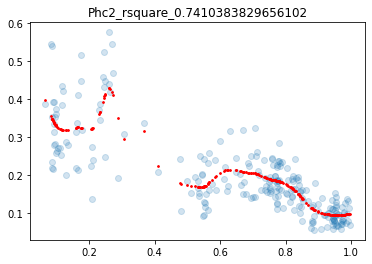

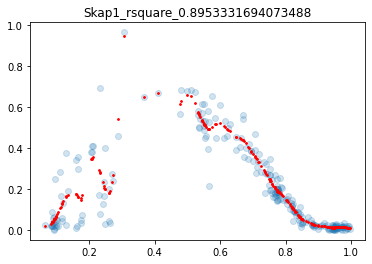

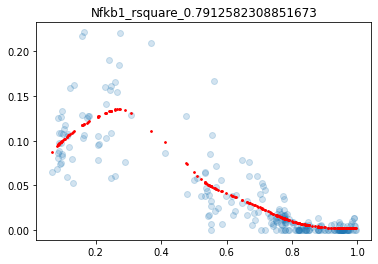

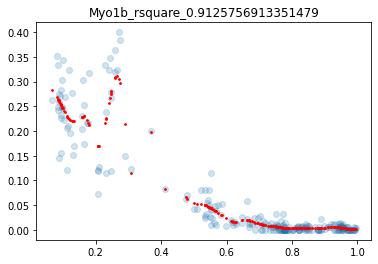

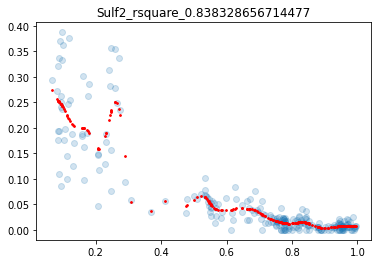

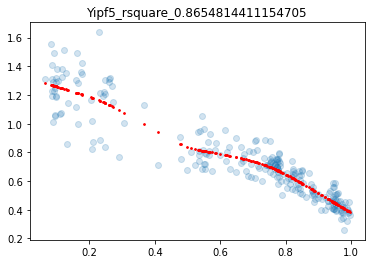

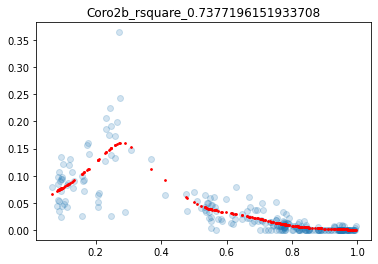

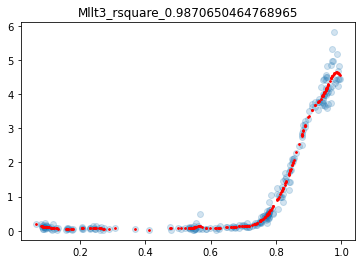

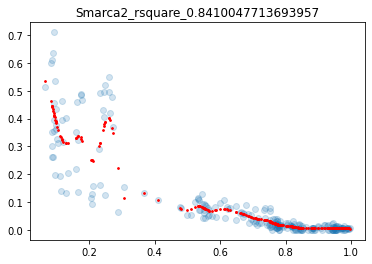

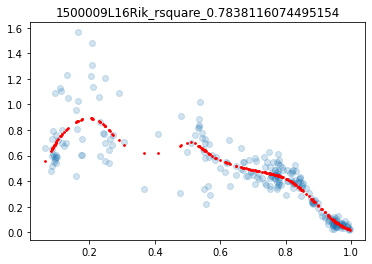

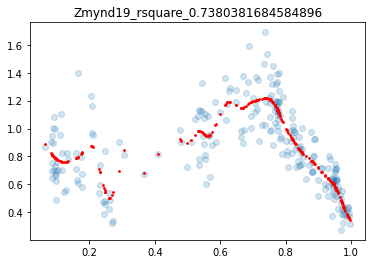

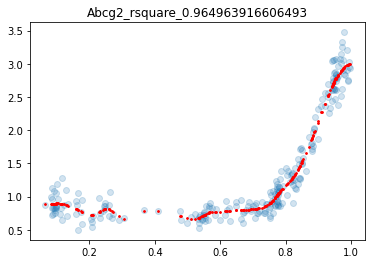

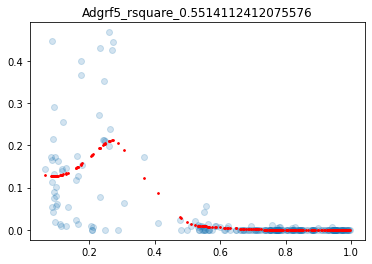

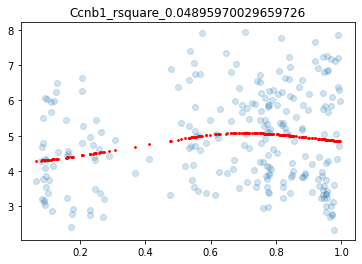

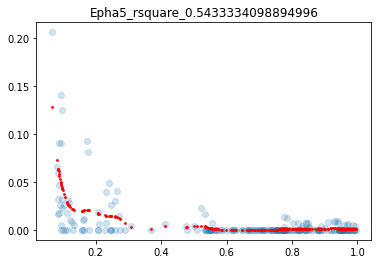

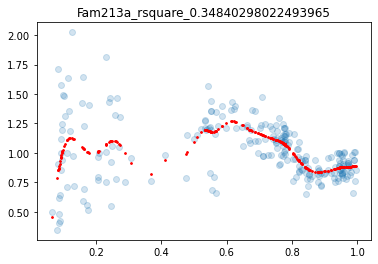

In [18]:
for idx in range(len(gene_list_story)):
    gene_name=gene_list_story[idx]
    onerow=r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name==gene_name]
    plt.figure()
    plt.scatter(s0_merged_part_time[s0_merged_part_time.index.isin(idx_downSampling_embedding)].time,s0_merged_part_gene[s0_merged_part_gene.index.isin(idx_downSampling_embedding)][gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time[s0_merged_part_time.index.isin(idx_downSampling_embedding)].time,list(onerow.combined)[0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(list(onerow.r_square)[0]))
    plt.show()

0.2680182018609039

In [19]:
len(s0_merged_part_time[s0_merged_part_time.index.isin(idx_downSampling_embedding)].time)
len(s0_merged_part_gene[s0_merged_part_gene.index.isin(idx_downSampling_embedding)][gene_name])
len(result[idx][0])

243

0.7838116074495154
0.5182203970359754
0.7101245043642803
0.6312209287034393
0.7052852681965672
0.663434564292599
0.6068952208628622
0.7308951663767063
0.8541881577072873
0.8044124014548474
0.9240482650188369
0.7716995041442437
0.8114594774342304
0.910445799562985
0.24372072585883217
0.747008820934439
0.42178866433807266
0.9347739002404001
0.8273443195218291
0.8672497702409261
0.7301131598595747
0.882552129508483
0.42016832280304756
0.753348246632489
0.6538829124283894
0.5035718599747115
0.8027650340585725
0.8127386542317615
0.27605047040613206
0.8814280663644873
0.9662082192252862
0.9093270089832827
0.6408073716416538
0.7491751063123339
0.4510819435943451
0.7573522895510661
0.7248471599481005
0.9056439465870927
0.6972289389044553
0.8358341103673591
0.8854570344463346
0.8829975296697596
0.8978455253663131
0.685451674973561
0.8941071330904367
0.5505754746299649
0.7307658203457807
0.6219656203868913
0.6243172673137153
0.6995814343305983
0.6795917156749317
0.09829690514713327
0.75736111401

0.20759359993952264


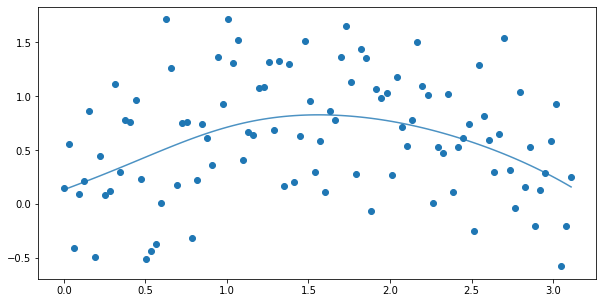

In [41]:
def non_para_kernel(X,Y):
    # RAW VERSION
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    
    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])

    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(X,Y)
    ax.plot(X[0], estimator, '-', alpha=0.8)
    return(estimator,kde.r_squared())

from utilities import non_para_kernel
X = pd.DataFrame(np.arange(100)*np.pi/100)
Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
estimator,r_square=non_para_kernel(X,Y)

In [310]:
# Traj cluster 0,pseudotime r square calculation
def _non_para_kernel_t3(X,Y,down_sample_idx): # this version has downsampling section
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    from statsmodels.nonparametric.kernel_regression import KernelReg
    import matplotlib.pyplot as plt
    Y=Y[X['index'].isin(down_sample_idx)]
    X=X[X['index'].isin(down_sample_idx)].time
    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])

    return(estimator,kde.r_squared())

def getidx_downSampling_embedding(load_cellDancer,traj_cluster=None):
    
    if traj_cluster is not None:
        load_cellDancer=load_cellDancer[load_cellDancer.cellIndex.isin(traj_cluster)]

    embedding=load_cellDancer.loc[load_cellDancer.gene_name==load_cellDancer.gene_name[0]][['embedding1','embedding2']]
    
    # get transfer id
    from sampling import sampling_embedding
    idx_downSampling_embedding = sampling_embedding(embedding,
                para='neighbors',
                target_amount=0,
                step_i=40,
                step_j=40
                )
    
    if traj_cluster is None:
        return(idx_downSampling_embedding)
    else:
        # transfer to the id of origional all detail list
        onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
        onegene.loc[:,['transfer_id']]=range(len(onegene))
        sampled_left=onegene[onegene.transfer_id.isin(idx_downSampling_embedding)]
        transfered_index=sampled_left.cellIndex
        return(transfered_index)

def get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,traj_cluster=None,):
    # downsample
    sampled_idx=getidx_downSampling_embedding(load_cellDancer,traj_cluster=traj_cluster)
        
    # PARALLEL thread
    from joblib import Parallel, delayed
    # run parallel
    result = Parallel(n_jobs=20, backend="loky")(
        delayed(_non_para_kernel_t3)(s0_merged_part_time,s0_merged_part_gene[gene_list[gene_index]],sampled_idx)
        for gene_index in range(0,len(gene_list)))
    return (result,sampled_idx)


gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list=['Hba-x','Smim1']
gene_list=s0_merged_part_gene.columns

#load_cellDancer,traj_cluster_0
result_test,sampled_idx=get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,traj_cluster=traj_cluster_0)

#gene_list=s0_merged_part_gene.columns

/Users/wanglab/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [441]:
sampled_idx

2            2
67          67
100        100
106        106
140        140
         ...  
12237    12237
12243    12243
12259    12259
12287    12287
12288    12288
Name: cellIndex, Length: 393, dtype: int64

In [399]:
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_idx=onegene[onegene.clusters=='Haematoendothelial progenitors'].cellIndex

cellIndex      gene_name        s0        u0        s1        u1  \
5              5  2810025M15Rik  2.480583  0.000000  2.479713  0.000015   
7              7  2810025M15Rik  2.620317  0.000000  2.619410  0.000015   
8              8  2810025M15Rik  2.686465  0.000000  2.685540  0.000014   
11            11  2810025M15Rik  4.376199  0.000000  4.374888  0.000008   
16            16  2810025M15Rik  2.692575  0.000000  2.691648  0.000014   
...          ...            ...       ...       ...       ...       ...   
12270      12270  2810025M15Rik  3.254813  0.000000  3.253745  0.000012   
12282      12282  2810025M15Rik  4.660343  0.000000  4.658978  0.000008   
12312      12312  2810025M15Rik  3.914581  0.006803  4.641866  0.004143   
12313      12313  2810025M15Rik  2.424764  0.000000  2.423909  0.000016   
12314      12314  2810025M15Rik  2.088405  0.000000  2.087646  0.000018   

          alpha      beta     gamma      cost                        clusters  \
5      0.001079  0.023167  0.005419  0.087183  Haematoendothelial progenitors   
7      0.001024  0.023243  0.005352  0.087183  Haematoendothelial progenitors   
8      0.000998  0.023279  0.005320  0.087183  Haematoendothelial progenitors   
11     0.000577  0.024042  0.004630  0.087183  Haematoendothelial progenitors   
16     0.000996  0.023282  0.005317  0.087183  Haematoendothelial progenitors   
...         ...       ...       ...       ...                             ...   
12270  0.000815  0.023565  0.005071  0.087183  Haematoendothelial progenitors   
12282  0.000531  0.024155  0.004524  0.087183  Haematoendothelial progenitors   
12312  0.002689  0.022704  0.005473  0.087183  Haematoendothelial progenitors   
12313  0.001102  0.023136  0.005446  0.087183  Haematoendothelial progenitors   
12314  0.001252  0.022949  0.005612  0.087183  Haematoendothelial progenitors   

            cellID  embedding1  embedding2  
5         cell_407   -0.788028   11.991024  
7         cell_419   -1.131426   12.003613  
8         cell_427   -1.167063   11.007467  
11        cell_469   -1.227092   13.523273  
16        cell_515   -0.213518   12.055215  
...            ...         ...         ...  
12270  cell_139038   -2.556308   13.106617  
12282  cell_139104   -1.419022   12.927310  
12312  cell_139261   -2.471491   13.658947  
12313  cell_139265   -1.911734   10.484631  
12314  cell_139266   -3.414126   11.173108  

[2514 rows x 14 columns]

In [294]:
# X=s0_merged_part_time.time
# Y=s0_merged_part_gene[['Hba-x']]
# X
#Y=Y[X['index'].isin(down_sample_idx)]
#X=X[X['index'].isin(down_sample_idx)]

In [311]:
# combine result
for i,result_i in enumerate(result_test):

    r_square=result_i[1]
    non_para_fit=result_i[0]
    #print(r_square)
    if i == 0:
        r_square_list = r_square
        non_para_fit_list = np.transpose(non_para_fit)
    else:
        r_square_list = np.vstack((r_square_list, r_square))
        non_para_fit_list = np.vstack((non_para_fit_list, np.transpose(non_para_fit)[0]))
r_square=pd.DataFrame({'gene_name':gene_list,'r_square':np.transpose(r_square_list)[0]})

In [312]:
non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=gene_list)
non_para_fit_heat.columns=sampled_idx
non_para_fit_heat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_heat_cluster2.csv')

In [313]:
non_para_fit_heat

cellIndex         15        297       376       382       399       444    \
0610010F05Rik  0.119479  0.120581  0.120993  0.121092  0.125693  0.136768   
1110038B12Rik  1.013342  1.017726  1.019360  1.019754  1.037741  1.078690   
1500009L16Rik  0.774276  0.779295  0.781165  0.781615  0.802184  0.850230   
1700017B05Rik  0.198433  0.198413  0.198403  0.198400  0.198199  0.196969   
1700027J19Rik  0.627834  0.630607  0.631647  0.631897  0.643583  0.672757   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.870659  0.870970  0.871087  0.871115  0.872434  0.875892   
Zscan21        0.539391  0.533539  0.531365  0.530842  0.507201  0.454647   
Zscan26        0.032964  0.032805  0.032746  0.032732  0.032084  0.030590   
Zswim6         0.123207  0.123009  0.122935  0.122918  0.122134  0.120481   
Zswim7         0.432451  0.433272  0.433578  0.433652  0.437031  0.444978   

cellIndex         516       604       612       685    ...     12008  \
0610010F05Rik  0.138690  0.140757  0.146153  0.149035  ...  0.050090   
1110038B12Rik  1.085421  1.092545  1.110672  1.120182  ...  0.538171   
1500009L16Rik  0.858532  0.867530  0.891797  0.905634  ...  0.032136   
1700017B05Rik  0.196626  0.196204  0.194776  0.193748  ...  0.061476   
1700027J19Rik  0.678095  0.683988  0.700481  0.710310  ...  0.005509   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.876570  0.877340  0.879635  0.881118  ...  0.198309   
Zscan21        0.446056  0.436931  0.413322  0.400499  ...  0.147326   
Zscan26        0.030337  0.030064  0.029344  0.028945  ...  0.002716   
Zswim6         0.120225  0.119959  0.119307  0.118984  ...  0.002992   
Zswim7         0.446354  0.447845  0.451851  0.454115  ...  0.231847   

cellIndex         12072     12093     12127     12136     12155     12193  \
0610010F05Rik  0.050695  0.051338  0.051784  0.052164  0.052395  0.053238   
1110038B12Rik  0.532472  0.526120  0.521516  0.517461  0.514931  0.505221   
1500009L16Rik  0.031010  0.029800  0.028949  0.028217  0.027768  0.026096   
1700017B05Rik  0.061111  0.060732  0.060475  0.060260  0.060131  0.059673   
1700027J19Rik  0.005303  0.005081  0.004925  0.004791  0.004709  0.004405   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.197694  0.197045  0.196598  0.196219  0.195989  0.195156   
Zscan21        0.146735  0.146076  0.145598  0.145175  0.144912  0.143895   
Zscan26        0.002545  0.002356  0.002219  0.002099  0.002025  0.001740   
Zswim6         0.002819  0.002628  0.002492  0.002373  0.002299  0.002019   
Zswim7         0.231507  0.231135  0.230870  0.230639  0.230496  0.229957   

cellIndex         12195     12243     12322  
0610010F05Rik  0.053695  0.054030  0.054047  
1110038B12Rik  0.499617  0.495343  0.495115  
1500009L16Rik  0.025165  0.024472  0.024435  
1700017B05Rik  0.059433  0.059261  0.059252  
1700027J19Rik  0.004236  0.004110  0.004104  
...                 ...       ...       ...  
Zrsr2          0.194708  0.194382  0.194365  
Zscan21        0.143304  0.142852  0.142828  
Zscan26        0.001576  0.001451  0.001444  
Zswim6         0.001859  0.001738  0.001731  
Zswim7         0.229652  0.229422  0.229410  

[2000 rows x 256 columns]

In [314]:
non_para_list=pd.DataFrame(non_para_fit_list)
non_para_list['combined']=non_para_list.values.tolist()
r_square
r_square_non_para_list=pd.concat([r_square,non_para_list['combined']],axis=1)
r_square_non_para_list_sort=r_square_non_para_list.sort_values(by=['r_square'], axis=0, ascending=False)
r_square_non_para_list_sort

gene_name  r_square                                           combined
187      Blvrb  0.995887  [0.25258948457061325, 0.25258888031862115, 0.2...
74        Alad  0.993982  [1.5175164474225293, 1.5075919107169526, 1.503...
742    Hbb-bh1  0.993528  [1.6117733710216382, 1.6134277225815585, 1.612...
741      Hba-x  0.993462  [0.873102789242383, 0.8505693144171229, 0.8420...
1787   Tmem14c  0.992333  [3.222653217526385, 3.235951839829437, 3.24087...
...        ...       ...                                                ...
1667      Spp1  0.078363  [-0.07679153527665739, -0.07567154381605551, -...
729       Gzmf  0.073086  [-0.06907044327584506, -0.06819246519697743, -...
730       Gzmg  0.061847  [-0.03051083876655475, -0.030035805555299576, ...
253      Ccnb1  0.048440  [4.642754648201857, 4.6423749613408285, 4.6422...
1735      Tbx4  0.029314  [0.00047731536084502543, 0.0004767670961848199...

[2000 rows x 3 columns]

In [315]:
s0_merged_part_time['index']

0         3592
1         3442
2         5365
3         1466
4         5435
         ...  
12324     3784
12325    11473
12326    11604
12327    12093
12328     6844
Name: index, Length: 12329, dtype: int64

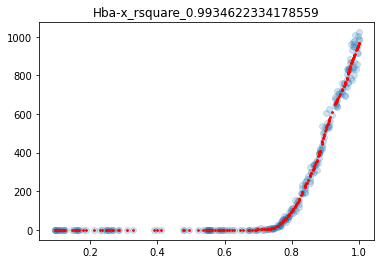

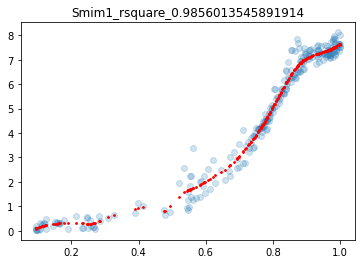

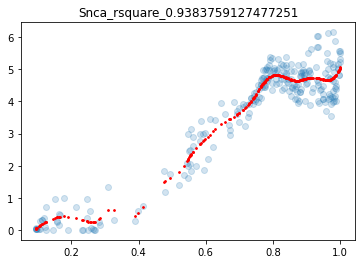

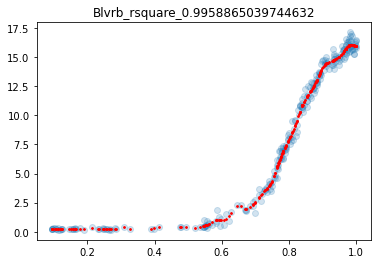

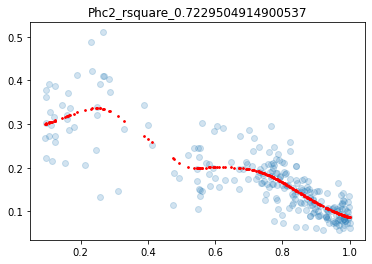

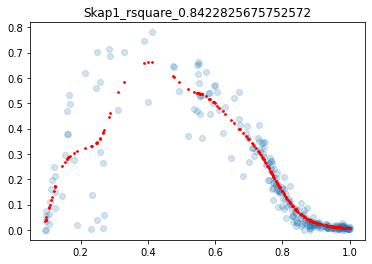

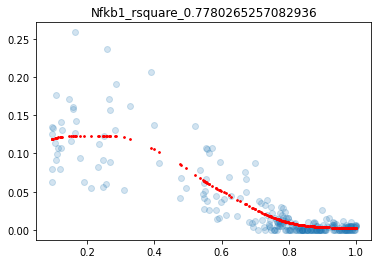

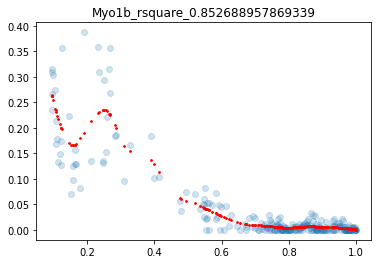

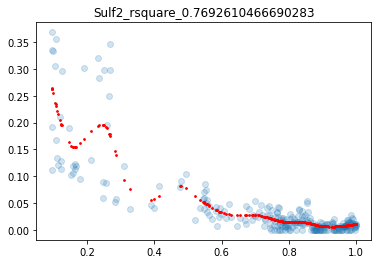

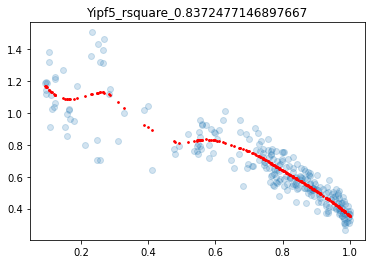

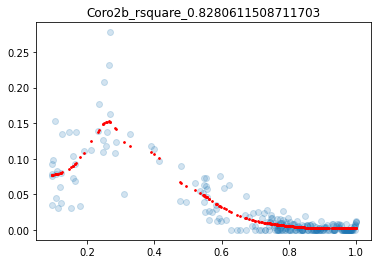

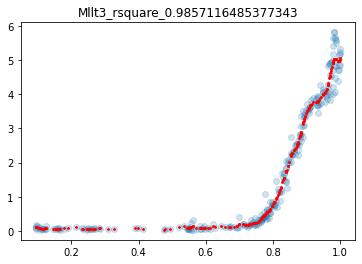

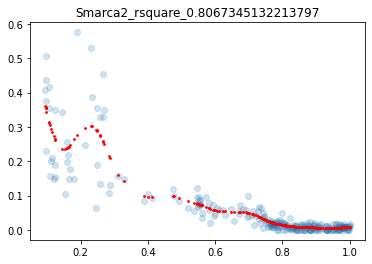

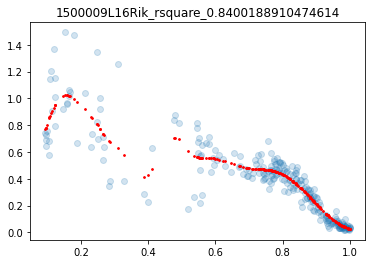

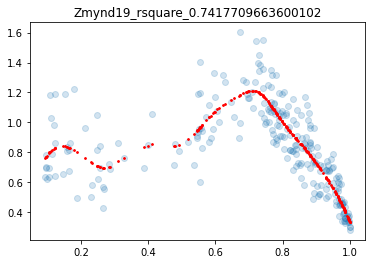

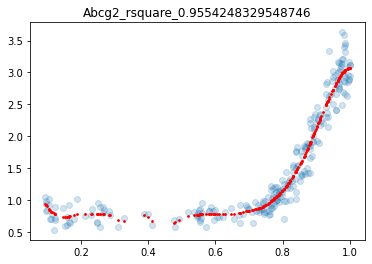

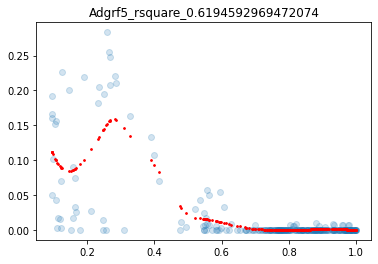

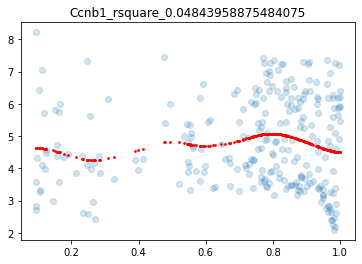

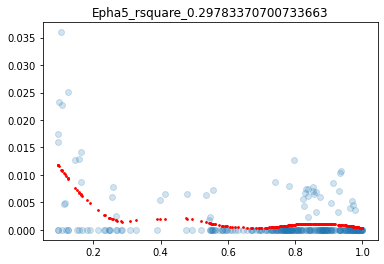

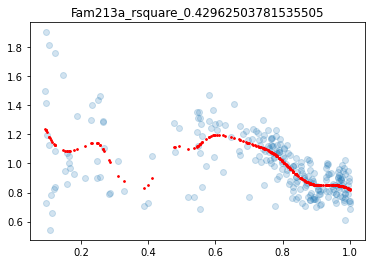

In [317]:
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']


for idx in range(len(gene_list_story)):
    gene_name=gene_list_story[idx]
    onerow=r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name==gene_name]
    plt.figure()
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,s0_merged_part_gene[s0_merged_part_time['index'].isin(sampled_idx)][gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,onerow.combined.reset_index(drop=True)[0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(list(onerow.r_square)[0]))
    plt.show()

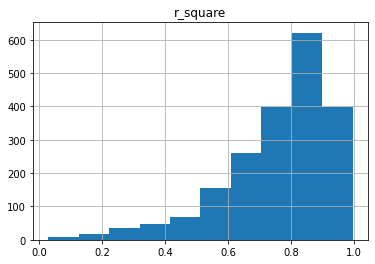

In [322]:
r_square_non_para_list.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(gene_list_story)]
point_eight_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_eight=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_eight.columns=sampled_idx
non_para_fit_heat_point_eight.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/non_para_fit_rsquare_0.8.heat_cluster2.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

In [324]:
non_para_fit_heat_point_eight

cellIndex         15        297       376       382       399       444    \
1110038B12Rik  1.013342  1.017726  1.019360  1.019754  1.037741  1.078690   
1500009L16Rik  0.774276  0.779295  0.781165  0.781615  0.802184  0.850230   
1700027J19Rik  0.627834  0.630607  0.631647  0.631897  0.643583  0.672757   
1700037H04Rik  0.775956  0.773876  0.773111  0.772928  0.764923  0.749419   
2410004B18Rik  1.679100  1.682442  1.683675  1.683971  1.697069  1.723558   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         1.584698  1.583741  1.583381  1.583294  1.579155  1.568096   
Zfp516         0.099442  0.099476  0.099491  0.099495  0.099742  0.100917   
Zfp706         6.838845  6.886245  6.903847  6.908080  7.099206  7.517412   
Zfp711         0.228081  0.231723  0.233189  0.233550  0.253767  0.329930   
Zrsr2          0.870659  0.870970  0.871087  0.871115  0.872434  0.875892   

cellIndex         516       604       612       685    ...     12008  \
1110038B12Rik  1.085421  1.092545  1.110672  1.120182  ...  0.538171   
1500009L16Rik  0.858532  0.867530  0.891797  0.905634  ...  0.032136   
1700027J19Rik  0.678095  0.683988  0.700481  0.710310  ...  0.005509   
1700037H04Rik  0.747245  0.745064  0.740080  0.737783  ...  1.156899   
2410004B18Rik  1.727417  1.731323  1.740323  1.744388  ...  0.629456   
...                 ...       ...       ...       ...  ...       ...   
Zfp428         1.565944  1.563515  1.556393  1.551891  ...  0.147777   
Zfp516         0.101210  0.101557  0.102654  0.103385  ...  0.006688   
Zfp706         7.583946  7.653692  7.828291  7.918455  ...  3.123733   
Zfp711         0.347011  0.366265  0.415496  0.436318  ...  0.014107   
Zrsr2          0.876570  0.877340  0.879635  0.881118  ...  0.198309   

cellIndex         12072     12093     12127     12136     12155     12193  \
1110038B12Rik  0.532472  0.526120  0.521516  0.517461  0.514931  0.505221   
1500009L16Rik  0.031010  0.029800  0.028949  0.028217  0.027768  0.026096   
1700027J19Rik  0.005303  0.005081  0.004925  0.004791  0.004709  0.004405   
1700037H04Rik  1.153382  1.149596  1.146932  1.144638  1.143229  1.137974   
2410004B18Rik  0.626582  0.623730  0.621884  0.620406  0.619551  0.616737   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         0.145704  0.143456  0.141865  0.140489  0.139642  0.136465   
Zfp516         0.006690  0.006687  0.006681  0.006674  0.006668  0.006639   
Zfp706         3.067276  3.005719  2.961953  2.923972  2.900533  2.812342   
Zfp711         0.014057  0.014122  0.014261  0.014455  0.014615  0.015541   
Zrsr2          0.197694  0.197045  0.196598  0.196219  0.195989  0.195156   

cellIndex         12195     12243     12322  
1110038B12Rik  0.499617  0.495343  0.495115  
1500009L16Rik  0.025165  0.024472  0.024435  
1700027J19Rik  0.004236  0.004110  0.004104  
1700037H04Rik  1.135040  1.132845  1.132729  
2410004B18Rik  0.615432  0.614587  0.614546  
...                 ...       ...       ...  
Zfp428         0.134683  0.133347  0.133276  
Zfp516         0.006617  0.006597  0.006596  
Zfp706         2.762635  2.725285  2.723304  
Zfp711         0.016334  0.017081  0.017124  
Zrsr2          0.194708  0.194382  0.194365  

[1032 rows x 256 columns]

In [17]:
non_para_fit_heat_point_eight_all_cell=s0_merged_part_gene[point_eight_rsquare_gene_name].T
#non_para_fit_heat_point_eight_all_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat_all_cell.csv')



In [235]:
non_para_fit_heat_point_eight

0         1         2         3         4         5    \
1110038B12Rik  0.759609  0.944433  0.946236  0.960976  0.966503  0.968185   
1500009L16Rik  0.628904  0.644041  0.644278  0.646819  0.648096  0.648525   
1700027J19Rik  0.786726  0.699481  0.699104  0.696232  0.695251  0.694962   
1700037H04Rik  0.479880  0.593273  0.594648  0.606237  0.610726  0.612107   
2410004B18Rik  1.972238  1.768837  1.767941  1.761262  1.759047  1.758404   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         1.709859  1.615769  1.615032  1.608902  1.606540  1.605813   
Zfp711         0.244127  0.285634  0.285974  0.288817  0.289916  0.290256   
Zfp948         0.186091  0.160006  0.159834  0.158463  0.157964  0.157813   
Znrf1          0.542939  0.463485  0.462877  0.457787  0.455807  0.455195   
Zrsr2          1.286328  1.023265  1.021718  1.009542  1.005174  1.003864   

                    6         7         8         9    ...       231  \
1110038B12Rik  0.988515  0.996964  1.003220  1.006290  ...  0.603248   
1500009L16Rik  0.655469  0.659488  0.662975  0.664860  ...  0.058753   
1700027J19Rik  0.691873  0.690823  0.690148  0.689852  ...  0.012088   
1700037H04Rik  0.629203  0.636446  0.641818  0.644449  ...  1.299316   
2410004B18Rik  1.751748  1.749597  1.748243  1.747654  ...  0.741930   
...                 ...       ...       ...       ...  ...       ...   
Zfp428         1.596593  1.592468  1.589273  1.587656  ...  0.179392   
Zfp711         0.294576  0.296524  0.298039  0.298809  ...  0.015787   
Zfp948         0.156012  0.155262  0.154700  0.154422  ...  0.047370   
Znrf1          0.447364  0.443824  0.441074  0.439681  ...  0.134914   
Zrsr2          0.988660  0.982645  0.978293  0.976187  ...  0.225003   

                    232       233       234       235       236       237  \
1110038B12Rik  0.598577  0.592356  0.574709  0.560226  0.556010  0.545957   
1500009L16Rik  0.057839  0.056690  0.053735  0.051541  0.050929  0.049510   
1700027J19Rik  0.012045  0.011989  0.011840  0.011724  0.011692  0.011616   
1700037H04Rik  1.296972  1.293909  1.285321  1.278133  1.275989  1.270757   
2410004B18Rik  0.735565  0.727793  0.709139  0.696647  0.693389  0.686213   
...                 ...       ...       ...       ...       ...       ...   
Zfp428         0.177492  0.175137  0.169275  0.165099  0.163963  0.161374   
Zfp711         0.015782  0.015777  0.015765  0.015756  0.015753  0.015745   
Zfp948         0.046433  0.045241  0.042156  0.039903  0.039289  0.037891   
Znrf1          0.135298  0.135821  0.137360  0.138664  0.139049  0.139978   
Zrsr2          0.225025  0.225063  0.225215  0.225377  0.225430  0.225562   

                    238       239       240  
1110038B12Rik  0.535435  0.531694  0.513594  
1500009L16Rik  0.048070  0.047567  0.045182  
1700027J19Rik  0.011540  0.011513  0.011390  
1700037H04Rik  1.265070  1.262990  1.252445  
2410004B18Rik  0.679501  0.677293  0.667773  
...                 ...       ...       ...  
Zfp428         0.158817  0.157940  0.153895  
Zfp711         0.015735  0.015731  0.015707  
Zfp948         0.036525  0.036061  0.033964  
Znrf1          0.140967  0.141322  0.143080  
Zrsr2          0.225713  0.225769  0.226060  

[1049 rows x 241 columns]

In [384]:
cluster2_rsquare_point_eight_heat_trend_line_morp_order=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/non_para_fit_rsquare_0.8.heat_cluster2_pearson_k_5_6_7.gct',index_col=0)

In [385]:
gene_sort=cluster2_rsquare_point_eight_heat_trend_line_morp_order.index

In [386]:
s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

In [387]:
s0_heatmap_raw=s0_heatmap_raw.T
s0_heatmap_raw

cellIndex         0         1         2         3         4         5      \
gene_name                                                                   
0610010F05Rik  0.312842  0.246910  0.168916  0.098369  0.116754  0.193911   
1110038B12Rik  1.355268  1.420308  1.079459  1.904841  1.416954  1.224898   
1500009L16Rik  0.622760  0.870611  0.638548  0.443685  0.486867  0.966799   
1700017B05Rik  0.114831  0.060433  0.060933  0.137706  0.124115  0.150768   
1700027J19Rik  0.721873  1.004247  1.007857  0.494196  0.599960  0.716323   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.936427  1.057224  0.837642  0.681012  0.695128  0.960495   
Zscan21        0.185909  0.177920  0.166337  0.188783  0.151390  0.327564   
Zscan26        0.020677  0.000000  0.011003  0.025781  0.000000  0.024406   
Zswim6         0.130681  0.116689  0.169939  0.080167  0.104746  0.090428   
Zswim7         0.292944  0.202664  0.267874  0.148841  0.318376  0.485015   

cellIndex         6         7         8         9      ...     12319  \
gene_name                                              ...             
0610010F05Rik  0.255794  0.166934  0.092309  0.187102  ...  0.051142   
1110038B12Rik  1.082312  0.954368  0.964514  1.359465  ...  0.485764   
1500009L16Rik  1.115119  0.859408  0.643850  0.887406  ...  0.067027   
1700017B05Rik  0.057764  0.139419  0.241332  0.105142  ...  0.020730   
1700027J19Rik  0.833474  0.678904  0.725359  0.957638  ...  0.005461   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.885461  0.961065  1.105348  0.936473  ...  0.208157   
Zscan21        0.172598  0.464385  0.417202  0.129500  ...  0.144760   
Zscan26        0.026449  0.020705  0.025665  0.006099  ...  0.009148   
Zswim6         0.052236  0.129285  0.142292  0.105780  ...  0.009888   
Zswim7         0.324337  0.441945  0.514816  0.286714  ...  0.292371   

cellIndex         12320     12321     12322     12323     12324     12325  \
gene_name                                                                   
0610010F05Rik  0.061666  0.040008  0.106277  0.065788  0.082322  0.039810   
1110038B12Rik  0.640474  0.700184  1.317336  1.350453  0.551254  0.602661   
1500009L16Rik  0.079232  0.053759  0.280404  0.325684  0.138677  0.042346   
1700017B05Rik  0.092907  0.054964  0.164896  0.086774  0.121784  0.040416   
1700027J19Rik  0.026175  0.009541  1.661138  0.123318  0.032495  0.024868   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.245828  0.194668  0.622178  0.543882  0.255452  0.204272   
Zscan21        0.180347  0.126890  0.109089  0.141033  0.238511  0.171801   
Zscan26        0.049160  0.003967  0.028578  0.037592  0.004707  0.004991   
Zswim6         0.000000  0.003685  0.183781  0.046678  0.000000  0.000000   
Zswim7         0.300282  0.209117  0.377352  0.227559  0.239490  0.320673   

cellIndex         12326     12327     12328  
gene_name                                    
0610010F05Rik  0.029527  0.028998  0.042932  
1110038B12Rik  0.742363  0.635604  0.758561  
1500009L16Rik  0.102660  0.070597  0.137588  
1700017B05Rik  0.089212  0.047425  0.188317  
1700027J19Rik  0.010656  0.006464  0.020039  
...                 ...       ...       ...  
Zrsr2          0.230350  0.236227  0.234467  
Zscan21        0.150204  0.091715  0.144220  
Zscan26        0.000000  0.013641  0.005487  
Zswim6         0.020103  0.018636  0.006542  
Zswim7         0.211783  0.331291  0.237870  

[2000 rows x 12329 columns]

In [388]:

s0_heatmap_raw=s0_heatmap_raw[s0_merged_part_time['index']]
s0_heatmap_raw['genename']=s0_heatmap_raw.index

cluster2_rsquare_point_eight_heat_trend_line_morp_order['genename']=cluster2_rsquare_point_eight_heat_trend_line_morp_order.index


/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [395]:
cluster2_rsquare_point_eight_heat_trend_line_morp_order

k_means_5  k_means_6  k_means_7  15.00  297.00  376.00  382.00  399.00  \
id                                                                              
Creg1        2.0        1.0        1.0   1.74    1.73    1.73    1.73    1.70   
Prr13        2.0        1.0        1.0   0.41    0.41    0.41    0.41    0.42   
Ifi35        2.0        1.0        1.0   0.00    0.00    0.00    0.00    0.01   
Asns         2.0        1.0        1.0   1.77    1.78    1.79    1.79    1.83   
Add2         2.0        1.0        1.0   0.00    0.00    0.00    0.00    0.00   
...          ...        ...        ...    ...     ...     ...     ...     ...   
Rplp1        5.0        6.0        3.0  51.28   51.50   51.58   51.60   52.50   
Rps29        5.0        6.0        3.0  10.26   10.25   10.25   10.25   10.22   
Rpl38        5.0        6.0        3.0   5.34    5.33    5.32    5.32    5.27   
Rps12        5.0        6.0        3.0  26.83   26.82   26.82   26.82   26.78   
Snrpg        5.0        6.0        3.0   8.90    8.88    8.88    8.88    8.82   

       444.00  516.00  ...  12072.00  12093.00  12127.00  12136.00  12155.00  \
id                     ...                                                     
Creg1    1.64    1.63  ...      4.68      4.70      4.72      4.74      4.75   
Prr13    0.42    0.42  ...      2.09      2.10      2.11      2.12      2.13   
Ifi35    0.01    0.01  ...      0.62      0.61      0.60      0.60      0.60   
Asns     1.94    1.96  ...      4.64      4.62      4.61      4.60      4.59   
Add2     0.00    0.00  ...      0.53      0.53      0.53      0.52      0.52   
...       ...     ...  ...       ...       ...       ...       ...       ...   
Rplp1   54.55   54.88  ...     41.15     40.97     40.84     40.73     40.66   
Rps29   10.17   10.16  ...      7.33      7.30      7.28      7.26      7.25   
Rpl38    5.15    5.13  ...      4.05      4.02      4.00      3.98      3.97   
Rps12   26.68   26.67  ...     20.50     20.41     20.35     20.29     20.25   
Snrpg    8.68    8.66  ...      6.15      6.10      6.07      6.04      6.02   

       12193.00  12195.00  12243.00  12322.00  genename  
id                                                       
Creg1      4.78      4.80      4.82      4.82     Creg1  
Prr13      2.14      2.15      2.16      2.16     Prr13  
Ifi35      0.58      0.57      0.57      0.57     Ifi35  
Asns       4.56      4.54      4.53      4.53      Asns  
Add2       0.52      0.52      0.52      0.52      Add2  
...         ...       ...       ...       ...       ...  
Rplp1     40.38     40.22     40.10     40.09     Rplp1  
Rps29      7.20      7.18      7.16      7.16     Rps29  
Rpl38      3.93      3.90      3.88      3.88     Rpl38  
Rps12     20.11     20.03     19.96     19.96     Rps12  
Snrpg      5.94      5.90      5.87      5.87     Snrpg  

[1032 rows x 260 columns]

In [389]:
s0_heatmap_raw

cellIndex          3592      3442      5365      1466      5435      5708  \
gene_name                                                                   
0610010F05Rik  0.045757  0.080250  0.115107  0.137819  0.116552  0.197066   
1110038B12Rik  0.755265  0.741811  0.668775  0.639425  0.688695  0.602106   
1500009L16Rik  0.517064  0.688037  0.593461  0.589416  0.543766  0.592949   
1700017B05Rik  0.227438  0.258093  0.263938  0.284990  0.254887  0.269743   
1700027J19Rik  0.922967  0.855593  0.728814  0.774082  0.828682  0.951477   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          1.399704  1.342300  1.375632  1.269846  1.391532  1.228825   
Zscan21        0.503637  0.469649  0.376475  0.433855  0.374823  0.405670   
Zscan26        0.056519  0.051361  0.049075  0.041823  0.052209  0.029705   
Zswim6         0.069720  0.068521  0.062892  0.066696  0.082408  0.076906   
Zswim7         0.368633  0.480809  0.412221  0.386500  0.363961  0.374022   

cellIndex          5271      8794      1942      5257  ...     11886  \
gene_name                                              ...             
0610010F05Rik  0.110084  0.085984  0.090186  0.090123  ...  0.029431   
1110038B12Rik  0.691465  0.869075  0.764494  0.732507  ...  0.461725   
1500009L16Rik  0.653523  0.571299  0.545219  0.618148  ...  0.026434   
1700017B05Rik  0.236177  0.253204  0.272313  0.213109  ...  0.027988   
1700027J19Rik  0.754265  0.860820  0.936495  0.562373  ...  0.000000   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          1.301730  1.528687  1.432183  1.505005  ...  0.176189   
Zscan21        0.436869  0.442711  0.370239  0.355077  ...  0.131430   
Zscan26        0.041758  0.071210  0.047412  0.030240  ...  0.000000   
Zswim6         0.089577  0.085488  0.103555  0.063987  ...  0.000000   
Zswim7         0.467112  0.437971  0.502860  0.375144  ...  0.197860   

cellIndex          7982     11435     11122      3784     11473     11604  \
gene_name                                                                   
0610010F05Rik  0.050349  0.054333  0.055289  0.051791  0.047917  0.046612   
1110038B12Rik  0.457142  0.434558  0.447485  0.427837  0.439269  0.396254   
1500009L16Rik  0.030603  0.059106  0.041182  0.015751  0.046427  0.034097   
1700017B05Rik  0.056373  0.053646  0.039584  0.049254  0.065170  0.081382   
1700027J19Rik  0.000000  0.031534  0.029881  0.018468  0.000000  0.004997   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.191772  0.230593  0.209804  0.193006  0.227903  0.200933   
Zscan21        0.129134  0.103691  0.113425  0.122173  0.149353  0.116318   
Zscan26        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim7         0.228986  0.267824  0.212243  0.237899  0.245249  0.232347   

cellIndex         12093      6844       genename  
gene_name                                         
0610010F05Rik  0.058128  0.150968  0610010F05Rik  
1110038B12Rik  0.386269  1.073956  1110038B12Rik  
1500009L16Rik  0.036737  0.761277  1500009L16Rik  
1700017B05Rik  0.058216  0.216169  1700017B05Rik  
1700027J19Rik  0.014156  0.668763  1700027J19Rik  
...                 ...       ...            ...  
Zrsr2          0.193190  0.906041          Zrsr2  
Zscan21        0.132394  0.324084        Zscan21  
Zscan26        0.000000  0.057876        Zscan26  
Zswim6         0.000000  0.074537         Zswim6  
Zswim7         0.224996  0.590614         Zswim7  

[2000 rows x 12330 columns]

In [390]:
cluster2_rsquare_point_eight_heat_trend_line_morp_order

k_means_5  k_means_6  k_means_7  15.00  297.00  376.00  382.00  399.00  \
id                                                                              
Creg1        2.0        1.0        1.0   1.74    1.73    1.73    1.73    1.70   
Prr13        2.0        1.0        1.0   0.41    0.41    0.41    0.41    0.42   
Ifi35        2.0        1.0        1.0   0.00    0.00    0.00    0.00    0.01   
Asns         2.0        1.0        1.0   1.77    1.78    1.79    1.79    1.83   
Add2         2.0        1.0        1.0   0.00    0.00    0.00    0.00    0.00   
...          ...        ...        ...    ...     ...     ...     ...     ...   
Rplp1        5.0        6.0        3.0  51.28   51.50   51.58   51.60   52.50   
Rps29        5.0        6.0        3.0  10.26   10.25   10.25   10.25   10.22   
Rpl38        5.0        6.0        3.0   5.34    5.33    5.32    5.32    5.27   
Rps12        5.0        6.0        3.0  26.83   26.82   26.82   26.82   26.78   
Snrpg        5.0        6.0        3.0   8.90    8.88    8.88    8.88    8.82   

       444.00  516.00  ...  12072.00  12093.00  12127.00  12136.00  12155.00  \
id                     ...                                                     
Creg1    1.64    1.63  ...      4.68      4.70      4.72      4.74      4.75   
Prr13    0.42    0.42  ...      2.09      2.10      2.11      2.12      2.13   
Ifi35    0.01    0.01  ...      0.62      0.61      0.60      0.60      0.60   
Asns     1.94    1.96  ...      4.64      4.62      4.61      4.60      4.59   
Add2     0.00    0.00  ...      0.53      0.53      0.53      0.52      0.52   
...       ...     ...  ...       ...       ...       ...       ...       ...   
Rplp1   54.55   54.88  ...     41.15     40.97     40.84     40.73     40.66   
Rps29   10.17   10.16  ...      7.33      7.30      7.28      7.26      7.25   
Rpl38    5.15    5.13  ...      4.05      4.02      4.00      3.98      3.97   
Rps12   26.68   26.67  ...     20.50     20.41     20.35     20.29     20.25   
Snrpg    8.68    8.66  ...      6.15      6.10      6.07      6.04      6.02   

       12193.00  12195.00  12243.00  12322.00  genename  
id                                                       
Creg1      4.78      4.80      4.82      4.82     Creg1  
Prr13      2.14      2.15      2.16      2.16     Prr13  
Ifi35      0.58      0.57      0.57      0.57     Ifi35  
Asns       4.56      4.54      4.53      4.53      Asns  
Add2       0.52      0.52      0.52      0.52      Add2  
...         ...       ...       ...       ...       ...  
Rplp1     40.38     40.22     40.10     40.09     Rplp1  
Rps29      7.20      7.18      7.16      7.16     Rps29  
Rpl38      3.93      3.90      3.88      3.88     Rpl38  
Rps12     20.11     20.03     19.96     19.96     Rps12  
Snrpg      5.94      5.90      5.87      5.87     Snrpg  

[1032 rows x 260 columns]

In [391]:
merged=pd.merge(cluster2_rsquare_point_eight_heat_trend_line_morp_order['genename'],s0_heatmap_raw,on='genename')

In [392]:
merged

genename       3592       3442       5365       1466       5435  \
0       Creg1   0.613867   0.584878   0.723020   0.803920   0.664959   
1       Prr13   0.578720   0.429673   0.405911   0.413992   0.514699   
2       Ifi35   0.018223   0.012378   0.004290   0.011376   0.005086   
3        Asns   1.640780   1.527842   1.659286   1.634987   1.452827   
4        Add2   0.000000   0.000000   0.000000   0.000000   0.000000   
...       ...        ...        ...        ...        ...        ...   
1027    Rplp1  52.723600  53.098250  52.802082  52.255486  52.195988   
1028    Rps29   9.360389   9.257208   9.442921   9.206772   9.362518   
1029    Rpl38   5.272231   5.530205   5.752664   5.649128   5.597174   
1030    Rps12  25.510954  26.456982  26.168333  25.801440  25.580624   
1031    Snrpg   9.490191   9.219458  10.038633   9.551734   9.880180   

           5708       5271       8794       1942  ...       3930      11886  \
0      0.866536   0.804955   0.613766   0.583065  ...   4.870055   5.239942   
1      0.469602   0.433378   0.464849   0.453190  ...   2.364623   2.549499   
2      0.007385   0.009111   0.004315   0.006295  ...   0.566565   0.679551   
3      1.495945   1.575325   1.561204   1.631746  ...   4.278711   4.097636   
4      0.000000   0.000000   0.000000   0.000000  ...   0.516930   0.568370   
...         ...        ...        ...        ...  ...        ...        ...   
1027  51.484905  53.080746  54.827915  54.015770  ...  36.181786  38.493595   
1028   9.303213   9.711910   9.682806   9.621553  ...   6.515258   6.816025   
1029   5.548239   5.763032   5.772085   5.786212  ...   3.556978   3.585779   
1030  25.562730  26.166021  26.991821  26.529710  ...  18.216590  19.142640   
1031   9.587748   9.540383   9.691066  10.216999  ...   5.213526   5.493199   

           7982      11435      11122       3784      11473      11604  \
0      4.893310   4.912415   5.146272   5.120722   4.961555   4.954481   
1      1.871999   1.839690   2.338436   2.130473   1.647790   1.997190   
2      0.500529   0.463260   0.602843   0.561446   0.513671   0.448253   
3      4.441939   4.713587   4.372080   4.321504   4.660203   4.403992   
4      0.426186   0.358488   0.523719   0.499404   0.450944   0.475564   
...         ...        ...        ...        ...        ...        ...   
1027  38.452873  38.382140  36.626553  36.997738  37.903236  36.936142   
1028   6.898762   6.852948   6.283097   6.544550   6.644645   6.525318   
1029   3.721283   3.663177   3.547211   3.526477   3.868514   3.647708   
1030  19.046902  18.694376  18.524372  18.437580  18.785147  18.369715   
1031   5.663278   5.853326   5.366442   5.386347   5.987198   5.611993   

          12093       6844  
0      4.985612   1.092724  
1      2.010331   0.312271  
2      0.447678   0.010264  
3      4.363931   2.480677  
4      0.467798   0.000000  
...         ...        ...  
1027  38.377705  53.471245  
1028   6.887806  10.245355  
1029   3.719113   5.453671  
1030  19.035942  25.623413  
1031   5.676361   8.064968  

[1032 rows x 12330 columns]

In [394]:
merged.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/test.csv', index=False)


#s0_heatmap_raw.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/point_eight_k_pearson_k6_trend_line_all_cell.csv',index=False)





In [4]:
################################# No Haematoendothelial progenitors ########################################

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from utilities import non_para_kernel

# radis 1, heatmap
#onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
#merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future
#cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth.csv')

def get_gene_s0_time(cell_time):
    cell_time_time_sort=cell_time.sort_values('pseudotime')
    cell_time_time_sort.columns=['index','time']

    s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

    s0_heatmap_raw
    s0_merged=pd.merge(cell_time_time_sort,s0_heatmap_raw,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future

    s0_merged_part_gene=s0_merged.loc[:, s0_merged.columns[2:]]
    s0_merged_part_time=s0_merged.loc[:, s0_merged.columns[0:2]]
    
    return(s0_merged_part_gene,s0_merged_part_time)

In [8]:
cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth_pz.csv')

s0_merged_part_gene,s0_merged_part_time=get_gene_s0_time(cell_time)

In [9]:
s0_merged_part_gene

0610010F05Rik  1110038B12Rik  1500009L16Rik  1700017B05Rik  \
0           0.045757       0.755265       0.517064       0.227438   
1           0.080250       0.741811       0.688037       0.258093   
2           0.115107       0.668775       0.593461       0.263938   
3           0.137819       0.639425       0.589416       0.284990   
4           0.116552       0.688695       0.543766       0.254887   
...              ...            ...            ...            ...   
12324       0.051791       0.427837       0.015751       0.049254   
12325       0.047917       0.439269       0.046427       0.065170   
12326       0.046612       0.396254       0.034097       0.081382   
12327       0.058128       0.386269       0.036737       0.058216   
12328       0.150968       1.073956       0.761277       0.216169   

       1700027J19Rik  1700037H04Rik  1810022K09Rik  1810026B05Rik  \
0           0.922967       0.382281       1.364491       0.187510   
1           0.855593       0.423024       1.368414       0.220291   
2           0.728814       0.425875       1.518204       0.281582   
3           0.774082       0.430224       1.360984       0.271929   
4           0.828682       0.450768       1.315259       0.244416   
...              ...            ...            ...            ...   
12324       0.018468       1.062508       0.898295       0.082108   
12325       0.000000       1.063562       0.975169       0.104583   
12326       0.004997       1.117103       0.839070       0.061199   
12327       0.014156       1.080593       0.909579       0.081570   
12328       0.668763       0.595283       1.397846       0.184090   

       1810032O08Rik  2410003L11Rik  ...     Zfpm1   Zmynd19    Zmynd8  \
0           0.236766       0.009605  ...  0.148109  0.694457  0.349836   
1           0.226738       0.006524  ...  0.157351  0.786802  0.298789   
2           0.266112       0.005795  ...  0.110479  0.847195  0.270915   
3           0.251287       0.005996  ...  0.132182  0.908192  0.273795   
4           0.267378       0.006870  ...  0.146318  0.789276  0.265576   
...              ...            ...  ...       ...       ...       ...   
12324       0.194437       0.011387  ...  0.664185  0.313405  0.068925   
12325       0.181934       0.025429  ...  0.620808  0.302924  0.100061   
12326       0.166920       0.018454  ...  0.636390  0.299466  0.093487   
12327       0.168199       0.011480  ...  0.611569  0.280441  0.086147   
12328       0.277530       0.016561  ...  0.336956  0.804891  0.255053   

          Znrf1     Znrf3     Zrsr2   Zscan21   Zscan26    Zswim6    Zswim7  
0      0.704492  0.020616  1.399704  0.503637  0.056519  0.069720  0.368633  
1      0.643703  0.014003  1.342300  0.469649  0.051361  0.068521  0.480809  
2      0.567095  0.051119  1.375632  0.376475  0.049075  0.062892  0.412221  
3      0.491161  0.060487  1.269846  0.433855  0.041823  0.066696  0.386500  
4      0.680683  0.031064  1.391532  0.374823  0.052209  0.082408  0.363961  
...         ...       ...       ...       ...       ...       ...       ...  
12324  0.131566  0.000000  0.193006  0.122173  0.000000  0.000000  0.237899  
12325  0.170091  0.005814  0.227903  0.149353  0.000000  0.000000  0.245249  
12326  0.105537  0.006916  0.200933  0.116318  0.000000  0.000000  0.232347  
12327  0.103024  0.006179  0.193190  0.132394  0.000000  0.000000  0.224996  
12328  0.311017  0.056688  0.906041  0.324084  0.057876  0.074537  0.590614  

[12329 rows x 2000 columns]

In [10]:
s0_merged_part_time

index      time
0       3592  0.046515
1       3442  0.047470
2       5365  0.047699
3       1466  0.047786
4       5435  0.048017
...      ...       ...
12324   3784  0.999367
12325  11473  0.999785
12326  11604  0.999789
12327  12093  0.999826
12328   6844  1.000000

[12329 rows x 2 columns]

In [38]:
# Traj cluster 0,pseudotime r square calculation
def _non_para_kernel_t4(X,Y,down_sample_idx): # this version has downsampling section
    # TO DO WHEN ONLY USING ONE GENE, WILL CAUSL PROBLEM WHEN COMBINING
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    from statsmodels.nonparametric.kernel_regression import KernelReg
    import matplotlib.pyplot as plt
    Y=Y[X['index'].isin(down_sample_idx)]
    X=X[X['index'].isin(down_sample_idx)].time
    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])

    return(estimator,kde.r_squared())

def getidx_downSampling_embedding(load_cellDancer,traj_cluster=None):
    
    if traj_cluster is not None:
        load_cellDancer=load_cellDancer[load_cellDancer.cellIndex.isin(traj_cluster)]
        
    embedding=load_cellDancer.loc[load_cellDancer.gene_name==list(load_cellDancer.gene_name)[0]][['embedding1','embedding2']]
    
    # get transfer id
    from sampling import sampling_embedding
    idx_downSampling_embedding = sampling_embedding(embedding,
                para='neighbors',
                target_amount=0,
                step_i=30,
                step_j=30
                )
    
    if traj_cluster is None:
        return(idx_downSampling_embedding)
    else:
        # transfer to the id of origional all detail list
        onegene=load_cellDancer[load_cellDancer.gene_name==list(load_cellDancer.gene_name)[0]]
        onegene.loc[:,['transfer_id']]=range(len(onegene))
        sampled_left=onegene[onegene.transfer_id.isin(idx_downSampling_embedding)]
        transfered_index=sampled_left.cellIndex
        return(transfered_index)

def get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,traj_cluster=None,):
    # downsample
    sampled_idx=getidx_downSampling_embedding(load_cellDancer,traj_cluster=traj_cluster)
        
    # PARALLEL thread
    from joblib import Parallel, delayed
    # run parallel
    result = Parallel(n_jobs=20, backend="loky")(
        delayed(_non_para_kernel_t4)(s0_merged_part_time,s0_merged_part_gene[gene_list[gene_index]],sampled_idx)
        for gene_index in range(0,len(gene_list)))
    return (result,sampled_idx)


onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_idx=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)
#gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list=['Hba-x','Smim1']
gene_list=s0_merged_part_gene.columns

#load_cellDancer,traj_cluster_0
result,sampled_idx=get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,traj_cluster=cell_idx)

#gene_list=s0_merged_part_gene.columns

/Users/wanglab/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [62]:
# combine result
def combine_parallel_result(result,gene_list,sampled_idx,merged_part_time):
    for i,result_i in enumerate(result):

        r_square=result_i[1]
        non_para_fit=result_i[0]
        #print(r_square)
        if i == 0:
            r_square_list = r_square
            non_para_fit_list = np.transpose(non_para_fit)
        else:
            r_square_list = np.vstack((r_square_list, r_square))
            non_para_fit_list = np.vstack((non_para_fit_list, np.transpose(non_para_fit)[0]))
    r_square=pd.DataFrame({'gene_name':gene_list,'r_square':np.transpose(r_square_list)[0]})

    non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=gene_list)
    non_para_fit_heat.columns=merged_part_time[merged_part_time['index'].isin(sampled_idx)]['index']

    non_para_list=pd.DataFrame(non_para_fit_list)
    non_para_list['combined']=non_para_list.values.tolist()
    r_square
    r_square_non_para_list=pd.concat([r_square,non_para_list['combined']],axis=1)
    r_square_non_para_list_sort=r_square_non_para_list.sort_values(by=['r_square'], axis=0, ascending=False)
    return(r_square_non_para_list_sort,non_para_fit_heat,non_para_fit_list)

In [65]:
r_square_non_para_list_sort,non_para_fit_heat,non_para_fit_list=combine_parallel_result(result,gene_list,sampled_idx,s0_merged_part_time)
non_para_fit_heat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_heat_no_HP_cls.csv')



In [55]:
r_square_non_para_list_sort

gene_name  r_square                                           combined
741      Hba-x  0.996023  [0.007834255102415866, 0.03803572555997777, 0....
742    Hbb-bh1  0.995612  [0.7958495167179587, 1.4754471328083683, 1.164...
74        Alad  0.995407  [1.131767832063023, 1.0302638897861776, 1.0130...
187      Blvrb  0.994995  [0.27536788070825136, 0.2782073088429384, 0.26...
753      Hebp1  0.994347  [0.040112078210387966, 0.059369711694486946, 0...
...        ...       ...                                                ...
1358     Ptprm  0.082513  [-2.7492539485776914e-05, -2.630513977709601e-...
831    Igfbpl1  0.074500  [0.009474621602216586, 0.009488973007107868, 0...
326       Clmp  0.055506  [0.012194002915284524, 0.01183076971560057, 0....
517      Epha5  0.028149  [-9.1711688506309e-05, -2.558801091968654e-05,...
1735      Tbx4  0.027059  [-8.702265194578541e-05, -7.405401784254452e-0...

[2000 rows x 3 columns]

In [ ]:
# build dictionary

In [64]:

ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}

def get_dict(load_cellDancer,ids):
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    map_dict=dict(zip(onegene.cellIndex, onegene.clusters.map(ids)))
    return(map_dict)

map_dict=get_dict(load_cellDancer,ids)
map_dict

def map_cellid_to_cluster(map_dict,cellid):
    mapped=cellid.map(map_dict)
    mapped_df=pd.DataFrame({'cluster':mapped},index=cellid).T
    return(mapped_df)
mapped_df=map_cellid_to_cluster(map_dict,non_para_fit_heat.columns)
mapped_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/downsampled_cluster_bar.csv')

In [105]:
non_para_fit_heat.columns

RangeIndex(start=0, stop=245, step=1)

In [56]:
sampled_idx

24          24
165        165
179        179
270        270
341        341
         ...  
12125    12125
12218    12218
12246    12246
12268    12268
12296    12296
Name: cellIndex, Length: 245, dtype: int64

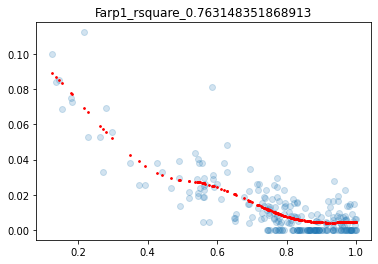

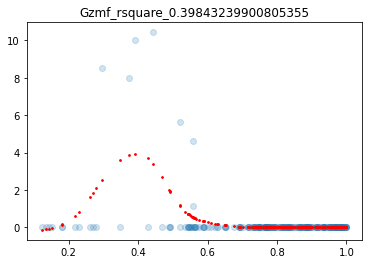

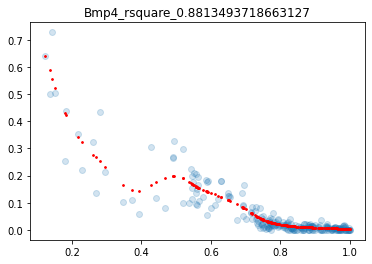

In [57]:
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
gene_list_story=['Farp1','Gzmf','Bmp4']

for idx in range(len(gene_list_story)):
    gene_name=gene_list_story[idx]
    onerow=r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name==gene_name]
    plt.figure()
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,s0_merged_part_gene[s0_merged_part_time['index'].isin(sampled_idx)][gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,onerow.combined.reset_index(drop=True)[0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(list(onerow.r_square)[0]))
    plt.show()

In [80]:
r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

0         Hba-x
1       Hbb-bh1
2          Alad
3         Blvrb
4         Hebp1
         ...   
1016     Tmem59
1017       Elk3
1018    Prpsap2
1019     Gm6213
1020     Nmral1
Name: gene_name, Length: 1021, dtype: object

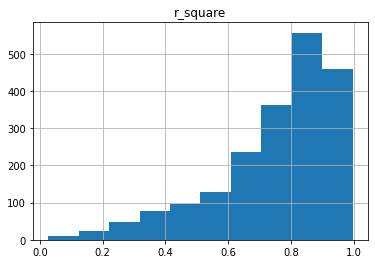

In [81]:
r_square_non_para_list_sort.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(s0_merged_part_gene.columns)]
point_eight_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_eight=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_eight.columns=s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)]['index']
non_para_fit_heat_point_eight.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.8.heat_no_HP_cls.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

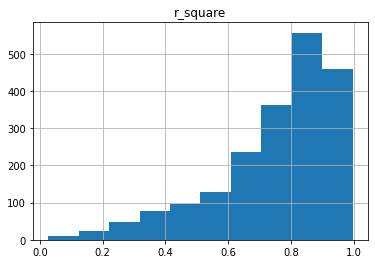

In [72]:
r_square_non_para_list_sort.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
#gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(s0_merged_part_gene.columns)]
point_seven_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.7].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_7=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_7.columns=s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)]['index']
non_para_fit_heat_point_7.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.7.heat_no_HP_cls.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

In [82]:
point_eight_rsquare_gene_name

0         Hba-x
1       Hbb-bh1
2          Alad
3         Blvrb
4         Hebp1
         ...   
1016     Tmem59
1017       Elk3
1018    Prpsap2
1019     Gm6213
1020     Nmral1
Name: gene_name, Length: 1021, dtype: object

In [85]:
non_para_fit_heat_point_eight_all_cell=s0_merged_part_gene[point_eight_rsquare_gene_name].T
#non_para_fit_heat_point_eight_all_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat_all_cell.csv')



In [86]:
non_para_fit_heat_point_eight_all_cell

0         1         2         3         4         5         6      \
Hba-x    0.522280  0.489208  0.759194  0.556622  0.600863  0.531305  0.603713   
Hbb-bh1  1.225941  1.219282  1.596230  1.336233  1.227931  1.480964  1.338364   
Alad     1.284337  1.344343  1.432221  1.393130  1.359084  1.435144  1.312302   
Blvrb    0.255312  0.221075  0.169796  0.180233  0.215238  0.206953  0.171017   
Hebp1    0.048055  0.026492  0.059375  0.040955  0.028803  0.057633  0.059906   
...           ...       ...       ...       ...       ...       ...       ...   
Tmem59   3.370363  3.211262  3.325608  3.355011  3.488307  3.790788  3.396844   
Elk3     0.894827  0.916056  0.868149  0.832361  0.860019  0.911525  0.842531   
Prpsap2  0.179394  0.308179  0.347695  0.295962  0.267854  0.238635  0.302510   
Gm6213   0.000000  0.004624  0.005892  0.006096  0.000000  0.000000  0.013377   
Nmral1   0.581676  0.598709  0.651112  0.647939  0.557084  0.748118  0.650030   

            7         8         9      ...        12319        12320  \
Hba-x    0.552663  0.510155  0.412073  ...  1023.169400   998.215200   
Hbb-bh1  1.272103  1.217034  1.310457  ...  1277.943600  1234.519900   
Alad     1.350205  1.367690  1.444840  ...    11.376315    11.711465   
Blvrb    0.218682  0.172789  0.170707  ...    15.778971    15.666063   
Hebp1    0.044300  0.042541  0.051087  ...     7.660205     7.566944   
...           ...       ...       ...  ...          ...          ...   
Tmem59   3.242167  3.461870  3.445785  ...     0.730773     0.772628   
Elk3     0.840812  0.863156  0.792370  ...     0.005240     0.006105   
Prpsap2  0.272054  0.240887  0.332426  ...     0.074291     0.069378   
Gm6213   0.004130  0.006026  0.017898  ...     0.000000     0.000000   
Nmral1   0.552790  0.534796  0.739573  ...     0.292773     0.305711   

               12321        12322        12323        12324        12325  \
Hba-x     977.052550   961.632900   989.528000  1004.166500   961.796260   
Hbb-bh1  1220.598900  1265.744300  1261.232500  1266.171400  1258.603000   
Alad       11.836102    11.350795    11.491257    11.526559    11.693607   
Blvrb      15.538877    16.526823    16.148640    15.995199    16.535450   
Hebp1       7.954022     7.837447     7.472093     7.937835     7.841999   
...              ...          ...          ...          ...          ...   
Tmem59      0.828037     0.956923     0.854554     0.803099     0.916287   
Elk3        0.005786     0.012883     0.005786     0.005410     0.013245   
Prpsap2     0.078956     0.058675     0.058908     0.068120     0.069222   
Gm6213      0.000000     0.000000     0.000000     0.000000     0.000000   
Nmral1      0.318086     0.317429     0.317428     0.305914     0.338726   

               12326        12327     12328  
Hba-x     988.840450   985.135400  0.029338  
Hbb-bh1  1268.793200  1257.874400  0.431943  
Alad       11.635975    11.218060  1.242999  
Blvrb      16.379723    16.494297  0.297251  
Hebp1       7.844292     7.820807  0.070440  
...              ...          ...       ...  
Tmem59      0.828249     0.816230  2.439610  
Elk3        0.006105     0.011616  0.383297  
Prpsap2     0.068113     0.061336  0.329142  
Gm6213      0.000000     0.000000  0.031400  
Nmral1      0.328837     0.292716  0.638801  

[1021 rows x 12329 columns]

In [87]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10.gct',index_col=0)



In [88]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order

k_means_6  k_means_10  4810.00  477.00  4613.00  4735.00  6884.00  \
id                                                                            
Abhd16a         1.0         1.0     0.38    0.40     0.41     0.43     0.47   
Actl6a          2.0         1.0     3.91    3.90     3.89     3.88     3.88   
Acvr2b          1.0         1.0     0.86    0.85     0.85     0.84     0.83   
Adss            1.0         1.0     2.91    2.91     2.91     2.91     2.90   
Ammecr1l        1.0         1.0     0.29    0.30     0.30     0.29     0.27   
...             ...         ...      ...     ...      ...      ...      ...   
Tmem14c         3.0        10.0     3.20    3.20     3.22     3.26     3.44   
Tmod1           3.0        10.0     0.00    0.00     0.01     0.01     0.01   
Trim10          3.0        10.0     0.02    0.02     0.02     0.02     0.02   
Tspan33         3.0        10.0     0.26    0.25     0.25     0.25     0.27   
Uros            3.0        10.0     0.14    0.12     0.12     0.11     0.12   

          4811.00  9641.00  464.00  ...  11745.00  4168.00  4278.00  11726.00  \
id                                  ...                                         
Abhd16a      0.48     0.54    0.56  ...      0.24     0.24     0.23      0.23   
Actl6a       3.88     3.90    3.90  ...      1.62     1.61     1.56      1.56   
Acvr2b       0.83     0.79    0.78  ...      0.07     0.06     0.06      0.06   
Adss         2.90     2.85    2.83  ...      0.66     0.66     0.64      0.64   
Ammecr1l     0.27     0.29    0.29  ...      0.09     0.09     0.09      0.09   
...           ...      ...     ...  ...       ...      ...      ...       ...   
Tmem14c      3.46     3.74    3.82  ...     28.41    28.42    28.46     28.47   
Tmod1        0.02     0.01    0.02  ...      0.97     0.97     0.99      0.99   
Trim10       0.02     0.01    0.01  ...      2.37     2.36     2.33      2.33   
Tspan33      0.28     0.34    0.33  ...      1.22     1.23     1.24      1.24   
Uros         0.12     0.18    0.20  ...      2.00     2.00     2.01      2.01   

          3922.00  3818.00  12125.00  3930.00  11604.00  12093.00  
id                                                                 
Abhd16a      0.23     0.23      0.23     0.23      0.23      0.23  
Actl6a       1.53     1.51      1.50     1.49      1.48      1.47  
Acvr2b       0.06     0.05      0.05     0.05      0.05      0.05  
Adss         0.63     0.62      0.62     0.61      0.61      0.61  
Ammecr1l     0.09     0.09      0.09     0.09      0.09      0.09  
...           ...      ...       ...      ...       ...       ...  
Tmem14c     28.48    28.50     28.50    28.51     28.52     28.52  
Tmod1        1.00     1.00      1.00     1.01      1.01      1.01  
Trim10       2.32     2.31      2.30     2.29      2.28      2.28  
Tspan33      1.25     1.26      1.26     1.26      1.27      1.27  
Uros         2.01     2.02      2.02     2.02      2.02      2.02  

[1021 rows x 247 columns]

In [89]:
gene_sort=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index

In [90]:
s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

In [91]:
s0_heatmap_raw=s0_heatmap_raw.T
s0_heatmap_raw

cellIndex         0         1         2         3         4         5      \
gene_name                                                                   
0610010F05Rik  0.312842  0.246910  0.168916  0.098369  0.116754  0.193911   
1110038B12Rik  1.355268  1.420308  1.079459  1.904841  1.416954  1.224898   
1500009L16Rik  0.622760  0.870611  0.638548  0.443685  0.486867  0.966799   
1700017B05Rik  0.114831  0.060433  0.060933  0.137706  0.124115  0.150768   
1700027J19Rik  0.721873  1.004247  1.007857  0.494196  0.599960  0.716323   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.936427  1.057224  0.837642  0.681012  0.695128  0.960495   
Zscan21        0.185909  0.177920  0.166337  0.188783  0.151390  0.327564   
Zscan26        0.020677  0.000000  0.011003  0.025781  0.000000  0.024406   
Zswim6         0.130681  0.116689  0.169939  0.080167  0.104746  0.090428   
Zswim7         0.292944  0.202664  0.267874  0.148841  0.318376  0.485015   

cellIndex         6         7         8         9      ...     12319  \
gene_name                                              ...             
0610010F05Rik  0.255794  0.166934  0.092309  0.187102  ...  0.051142   
1110038B12Rik  1.082312  0.954368  0.964514  1.359465  ...  0.485764   
1500009L16Rik  1.115119  0.859408  0.643850  0.887406  ...  0.067027   
1700017B05Rik  0.057764  0.139419  0.241332  0.105142  ...  0.020730   
1700027J19Rik  0.833474  0.678904  0.725359  0.957638  ...  0.005461   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.885461  0.961065  1.105348  0.936473  ...  0.208157   
Zscan21        0.172598  0.464385  0.417202  0.129500  ...  0.144760   
Zscan26        0.026449  0.020705  0.025665  0.006099  ...  0.009148   
Zswim6         0.052236  0.129285  0.142292  0.105780  ...  0.009888   
Zswim7         0.324337  0.441945  0.514816  0.286714  ...  0.292371   

cellIndex         12320     12321     12322     12323     12324     12325  \
gene_name                                                                   
0610010F05Rik  0.061666  0.040008  0.106277  0.065788  0.082322  0.039810   
1110038B12Rik  0.640474  0.700184  1.317336  1.350453  0.551254  0.602661   
1500009L16Rik  0.079232  0.053759  0.280404  0.325684  0.138677  0.042346   
1700017B05Rik  0.092907  0.054964  0.164896  0.086774  0.121784  0.040416   
1700027J19Rik  0.026175  0.009541  1.661138  0.123318  0.032495  0.024868   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.245828  0.194668  0.622178  0.543882  0.255452  0.204272   
Zscan21        0.180347  0.126890  0.109089  0.141033  0.238511  0.171801   
Zscan26        0.049160  0.003967  0.028578  0.037592  0.004707  0.004991   
Zswim6         0.000000  0.003685  0.183781  0.046678  0.000000  0.000000   
Zswim7         0.300282  0.209117  0.377352  0.227559  0.239490  0.320673   

cellIndex         12326     12327     12328  
gene_name                                    
0610010F05Rik  0.029527  0.028998  0.042932  
1110038B12Rik  0.742363  0.635604  0.758561  
1500009L16Rik  0.102660  0.070597  0.137588  
1700017B05Rik  0.089212  0.047425  0.188317  
1700027J19Rik  0.010656  0.006464  0.020039  
...                 ...       ...       ...  
Zrsr2          0.230350  0.236227  0.234467  
Zscan21        0.150204  0.091715  0.144220  
Zscan26        0.000000  0.013641  0.005487  
Zswim6         0.020103  0.018636  0.006542  
Zswim7         0.211783  0.331291  0.237870  

[2000 rows x 12329 columns]

In [92]:
s0_merged_part_time

index      time
0       3592  0.046515
1       3442  0.047470
2       5365  0.047699
3       1466  0.047786
4       5435  0.048017
...      ...       ...
12324   3784  0.999367
12325  11473  0.999785
12326  11604  0.999789
12327  12093  0.999826
12328   6844  1.000000

[12329 rows x 2 columns]

In [93]:
cell_idx_no_HP=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)


s0_heatmap_raw=s0_heatmap_raw[s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)]['index']]
s0_heatmap_raw['genename']=s0_heatmap_raw.index



no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename']=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index
no_HP_rsquare_point_eight_heat_trend_line_morp_order

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


k_means_6  k_means_10  4810.00  477.00  4613.00  4735.00  6884.00  \
id                                                                            
Abhd16a         1.0         1.0     0.38    0.40     0.41     0.43     0.47   
Actl6a          2.0         1.0     3.91    3.90     3.89     3.88     3.88   
Acvr2b          1.0         1.0     0.86    0.85     0.85     0.84     0.83   
Adss            1.0         1.0     2.91    2.91     2.91     2.91     2.90   
Ammecr1l        1.0         1.0     0.29    0.30     0.30     0.29     0.27   
...             ...         ...      ...     ...      ...      ...      ...   
Tmem14c         3.0        10.0     3.20    3.20     3.22     3.26     3.44   
Tmod1           3.0        10.0     0.00    0.00     0.01     0.01     0.01   
Trim10          3.0        10.0     0.02    0.02     0.02     0.02     0.02   
Tspan33         3.0        10.0     0.26    0.25     0.25     0.25     0.27   
Uros            3.0        10.0     0.14    0.12     0.12     0.11     0.12   

          4811.00  9641.00  464.00  ...  4168.00  4278.00  11726.00  3922.00  \
id                                  ...                                        
Abhd16a      0.48     0.54    0.56  ...     0.24     0.23      0.23     0.23   
Actl6a       3.88     3.90    3.90  ...     1.61     1.56      1.56     1.53   
Acvr2b       0.83     0.79    0.78  ...     0.06     0.06      0.06     0.06   
Adss         2.90     2.85    2.83  ...     0.66     0.64      0.64     0.63   
Ammecr1l     0.27     0.29    0.29  ...     0.09     0.09      0.09     0.09   
...           ...      ...     ...  ...      ...      ...       ...      ...   
Tmem14c      3.46     3.74    3.82  ...    28.42    28.46     28.47    28.48   
Tmod1        0.02     0.01    0.02  ...     0.97     0.99      0.99     1.00   
Trim10       0.02     0.01    0.01  ...     2.36     2.33      2.33     2.32   
Tspan33      0.28     0.34    0.33  ...     1.23     1.24      1.24     1.25   
Uros         0.12     0.18    0.20  ...     2.00     2.01      2.01     2.01   

          3818.00  12125.00  3930.00  11604.00  12093.00  genename  
id                                                                  
Abhd16a      0.23      0.23     0.23      0.23      0.23   Abhd16a  
Actl6a       1.51      1.50     1.49      1.48      1.47    Actl6a  
Acvr2b       0.05      0.05     0.05      0.05      0.05    Acvr2b  
Adss         0.62      0.62     0.61      0.61      0.61      Adss  
Ammecr1l     0.09      0.09     0.09      0.09      0.09  Ammecr1l  
...           ...       ...      ...       ...       ...       ...  
Tmem14c     28.50     28.50    28.51     28.52     28.52   Tmem14c  
Tmod1        1.00      1.00     1.01      1.01      1.01     Tmod1  
Trim10       2.31      2.30     2.29      2.28      2.28    Trim10  
Tspan33      1.26      1.26     1.26      1.27      1.27   Tspan33  
Uros         2.02      2.02     2.02      2.02      2.02      Uros  

[1021 rows x 248 columns]

In [95]:
s0_heatmap_raw

cellIndex           400      4802      6769      4543      4758      4421  \
gene_name                                                                   
0610010F05Rik  0.155570  0.194810  0.132937  0.199482  0.179454  0.207584   
1110038B12Rik  1.107686  1.187867  1.225331  1.176802  1.015425  1.288435   
1500009L16Rik  1.017211  1.055389  0.927264  0.982797  1.037973  1.194845   
1700017B05Rik  0.209772  0.149293  0.268845  0.165438  0.201807  0.215851   
1700027J19Rik  0.621100  0.571700  0.687210  0.687712  0.481906  0.610636   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.718664  0.901558  0.957862  1.025478  0.984380  0.804070   
Zscan21        0.264112  0.324044  0.409851  0.309417  0.256726  0.222831   
Zscan26        0.016154  0.000000  0.012263  0.025162  0.008473  0.009825   
Zswim6         0.045572  0.065701  0.124007  0.059556  0.050142  0.026827   
Zswim7         0.541194  0.447717  0.561941  0.483724  0.446138  0.538194   

cellIndex          4851      6610      6607      6793  ...      3930  \
gene_name                                              ...             
0610010F05Rik  0.223742  0.195962  0.161354  0.115241  ...  0.044262   
1110038B12Rik  1.318333  1.380350  1.277662  1.271566  ...  0.403637   
1500009L16Rik  1.022657  0.959702  1.146745  0.829605  ...  0.034380   
1700017B05Rik  0.140685  0.153807  0.200860  0.219595  ...  0.062164   
1700027J19Rik  0.630328  0.602872  0.658489  0.682819  ...  0.000000   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.932721  0.829299  0.832335  0.746123  ...  0.193013   
Zscan21        0.260088  0.260965  0.301683  0.265838  ...  0.123622   
Zscan26        0.043197  0.000000  0.028231  0.024003  ...  0.000000   
Zswim6         0.087239  0.040424  0.079116  0.082975  ...  0.000000   
Zswim7         0.424259  0.521693  0.619038  0.663605  ...  0.246866   

cellIndex         11886      7982     11435     11122      3784     11473  \
gene_name                                                                   
0610010F05Rik  0.029431  0.050349  0.054333  0.055289  0.051791  0.047917   
1110038B12Rik  0.461725  0.457142  0.434558  0.447485  0.427837  0.439269   
1500009L16Rik  0.026434  0.030603  0.059106  0.041182  0.015751  0.046427   
1700017B05Rik  0.027988  0.056373  0.053646  0.039584  0.049254  0.065170   
1700027J19Rik  0.000000  0.000000  0.031534  0.029881  0.018468  0.000000   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.176189  0.191772  0.230593  0.209804  0.193006  0.227903   
Zscan21        0.131430  0.129134  0.103691  0.113425  0.122173  0.149353   
Zscan26        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim7         0.197860  0.228986  0.267824  0.212243  0.237899  0.245249   

cellIndex         11604     12093       genename  
gene_name                                         
0610010F05Rik  0.046612  0.058128  0610010F05Rik  
1110038B12Rik  0.396254  0.386269  1110038B12Rik  
1500009L16Rik  0.034097  0.036737  1500009L16Rik  
1700017B05Rik  0.081382  0.058216  1700017B05Rik  
1700027J19Rik  0.004997  0.014156  1700027J19Rik  
...                 ...       ...            ...  
Zrsr2          0.200933  0.193190          Zrsr2  
Zscan21        0.116318  0.132394        Zscan21  
Zscan26        0.000000  0.000000        Zscan26  
Zswim6         0.000000  0.000000         Zswim6  
Zswim7         0.232347  0.224996         Zswim7  

[2000 rows x 9816 columns]

In [96]:
merged=pd.merge(no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename'],s0_heatmap_raw,on='genename')

In [97]:
merged

genename       400      4802      6769      4543      4758      4421  \
0      Abhd16a  0.412748  0.331164  0.290473  0.381085  0.359499  0.422851   
1       Actl6a  3.877499  4.087953  3.720115  4.179265  3.963922  3.860403   
2       Acvr2b  0.808786  0.750717  0.834348  0.764101  0.938699  0.910351   
3         Adss  2.901829  2.743523  2.205427  2.844265  2.699765  2.971019   
4     Ammecr1l  0.220746  0.310054  0.237129  0.330180  0.317690  0.286255   
...        ...       ...       ...       ...       ...       ...       ...   
1016   Tmem14c  3.695666  3.169179  3.572033  3.005523  3.108299  3.116515   
1017     Tmod1  0.000000  0.000000  0.000000  0.003675  0.000000  0.000000   
1018    Trim10  0.004025  0.013750  0.000000  0.000000  0.017511  0.003888   
1019   Tspan33  0.347547  0.176020  0.115665  0.116071  0.302258  0.245856   
1020      Uros  0.159734  0.165201  0.123599  0.119725  0.135535  0.153992   

          4851      6610      6607  ...      11751       3930      11886  \
0     0.277034  0.396213  0.317614  ...   0.294592   0.202515   0.207560   
1     4.210298  3.925261  3.755981  ...   1.509015   1.264778   1.336434   
2     0.895283  0.835232  0.897377  ...   0.057165   0.041104   0.023751   
3     2.692523  2.913272  2.455237  ...   0.600645   0.552270   0.475239   
4     0.226035  0.320088  0.327121  ...   0.099032   0.078465   0.101372   
...        ...       ...       ...  ...        ...        ...        ...   
1016  3.314383  3.209562  3.752554  ...  28.031555  28.428867  28.451462   
1017  0.022694  0.000000  0.007884  ...   1.060639   1.048686   0.811260   
1018  0.027836  0.000000  0.021946  ...   2.348661   2.295867   2.107942   
1019  0.264824  0.230212  0.250806  ...   1.244604   1.222427   1.249040   
1020  0.134767  0.170381  0.125966  ...   2.024530   1.932331   1.831320   

           7982      11435      11122       3784      11473      11604  \
0      0.243239   0.284812   0.247320   0.257767   0.270191   0.243669   
1      1.497797   1.412641   1.250936   1.320378   1.404000   1.332335   
2      0.038855   0.041003   0.040701   0.030657   0.034704   0.040632   
3      0.628446   0.598506   0.580363   0.575916   0.648302   0.580709   
4      0.083780   0.102391   0.083741   0.093345   0.088655   0.090335   
...         ...        ...        ...        ...        ...        ...   
1016  28.428474  28.009320  28.290705  28.514296  28.583807  28.822367   
1017   0.976028   1.063485   1.049461   0.956105   1.050819   0.996605   
1018   2.194609   2.166462   2.275257   2.243190   2.295411   2.235307   
1019   1.353803   1.294013   1.261178   1.322758   1.243145   1.311663   
1020   1.893709   1.885720   2.038352   1.987377   2.051372   2.001123   

          12093  
0      0.211366  
1      1.338036  
2      0.062221  
3      0.559741  
4      0.089452  
...         ...  
1016  28.832900  
1017   1.019575  
1018   2.248435  
1019   1.313552  
1020   1.915690  

[1021 rows x 9816 columns]

In [98]:
merged.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_rsquare_0.8.heat_no_HP.csv', index=False)


#s0_heatmap_raw.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/point_eight_k_pearson_k6_trend_line_all_cell.csv',index=False)





In [107]:
# get the cluster for merged
def map_cellid_to_cluster(map_dict,cellid):
    mapped=cellid.map(map_dict)
    mapped_df=pd.DataFrame({'cluster':mapped},index=cellid).T
    return(mapped_df)
mapped_cluster_df_all_cell_no_HP=map_cellid_to_cluster(map_dict,merged.columns[1:])
mapped_cluster_df_all_cell_no_HP.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_non_para_s0_sortByK10_rsquare_0.8.heat_no_HP_mapped_cluster_df_all_cell_no_HP.csv')

In [101]:
mapped_df

index    4810   477    4613   4735   6884   4811   9641   464    1211   10262  \
cluster      1      1      1      1      1      1      1      1      1      1   

index    ...  11745  4168   4278   11726  3922   3818   12125  3930   11604  \
cluster  ...      5      5      5      5      5      5      5      5      5   

index    12093  
cluster      5  

[1 rows x 245 columns]

In [136]:
# 1. re order no_HP_rsquare_point_eight_heat_trend_line_morp_order
cluster_by_10=no_HP_rsquare_point_eight_heat_trend_line_morp_order

cluster_4=cluster_by_10[cluster_by_10.k_means_10==1]
cluster_8=cluster_by_10[cluster_by_10.k_means_10==2]
cluster_3=cluster_by_10[cluster_by_10.k_means_10==3]
cluster_1=cluster_by_10[cluster_by_10.k_means_10==4]
cluster_6=cluster_by_10[(cluster_by_10.k_means_10==5) | (cluster_by_10.k_means_10==7)]
cluster_5=cluster_by_10[cluster_by_10.k_means_10==6]
cluster_2=cluster_by_10[(cluster_by_10.k_means_10==8) | (cluster_by_10.k_means_10==9)]
cluster_7=cluster_by_10[cluster_by_10.k_means_10==10]

cluster_by_10_sort_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8]

cluster_by_10_sort=pd.DataFrame()
for enu,i in enumerate(cluster_by_10_sort_list):
    if enu==0:
        cluster_by_10_sort=i
    else:
        cluster_by_10_sort=cluster_by_10_sort.append(i)
    print(len(i))
cluster_by_10_sort.shape
#cluster_by_10.shape

150
97
254
249
118
54
47
52


(1021, 248)

In [190]:
# 1.1 output genename to do david
for enu,cluster in enumerate(cluster_by_10_sort_list):
    cluster.index
    pd.DataFrame(cluster.index).to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_david/gene_in_cluster'+str(enu+1)+'.csv'),header=False,index=False)
# end - 1.1

In [200]:
# 1.2 

cluster_overall= np.array([])

for enu,i in enumerate(cluster_by_10_sort_list):
    cluster_num = np.array([enu+1])
    cluster_num_times=np.tile(cluster_num,len(i))
    cluster_overall=np.append(cluster_overall, cluster_num_times)
print(cluster_overall.shape)
cluster_overall_df=pd.DataFrame({'cluster_of_10':cluster_overall})
cluster_overall_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/bar_reorder_cluster_in_10.csv')

(1021,)


In [132]:
reorder_k_10=cluster_by_10_sort[cluster_by_10_sort.columns[2:-1]]
reorder_k_10.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10_reorder.csv')

4810.00  477.00  4613.00  4735.00  6884.00  4811.00  9641.00  \
id                                                                            
3632451O06Rik     0.28    0.26     0.25     0.23     0.20     0.20     0.16   
Ablim1            0.57    0.56     0.55     0.54     0.50     0.50     0.44   
Afdn              0.58    0.55     0.53     0.51     0.45     0.44     0.37   
Amot              0.42    0.43     0.43     0.44     0.43     0.43     0.39   
Amotl1            0.11    0.10     0.11     0.11     0.10     0.10     0.07   
...                ...     ...      ...      ...      ...      ...      ...   
Slc2a1            2.46    2.51     2.49     2.41     2.10     2.08     2.07   
Slc4a1           -0.00   -0.00     0.00     0.00    -0.00     0.00    -0.00   
St3gal6           0.26    0.25     0.25     0.24     0.21     0.21     0.17   
Trib3             0.04    0.03     0.05     0.10     0.04     0.03     0.01   
Urod              0.77    0.73     0.71     0.70     0.68     0.69     0.83   

               464.00  1211.00  10262.00  ...  4168.00  4278.00  11726.00  \
id                                        ...                               
3632451O06Rik    0.15     0.12      0.11  ...     0.01     0.00      0.00   
Ablim1           0.42     0.36      0.34  ...     0.00     0.00      0.00   
Afdn             0.35     0.29      0.28  ...     0.03     0.03      0.03   
Amot             0.38     0.35      0.34  ...     0.05     0.05      0.05   
Amotl1           0.06     0.09      0.08  ...     0.00     0.00      0.00   
...               ...      ...       ...  ...      ...      ...       ...   
Slc2a1           2.02     1.94      1.93  ...     3.27     3.26      3.26   
Slc4a1           0.00    -0.00      0.00  ...     2.26     2.31      2.31   
St3gal6          0.16     0.16      0.17  ...     0.72     0.74      0.74   
Trib3            0.00     0.03      0.02  ...     0.31     0.34      0.35   
Urod             0.85     0.80      0.83  ...     6.65     6.75      6.75   

               3922.00  3818.00  12125.00  3930.00  11604.00  12093.00  \
id                                                                       
3632451O06Rik     0.00     0.00      0.00     0.00      0.00      0.00   
Ablim1            0.00     0.00      0.00     0.00      0.00      0.00   
Afdn              0.03     0.03      0.03     0.03      0.03      0.03   
Amot              0.05     0.05      0.05     0.05      0.05      0.05   
Amotl1            0.00     0.00      0.00     0.00      0.00      0.00   
...                ...      ...       ...      ...       ...       ...   
Slc2a1            3.25     3.24      3.24     3.23      3.23      3.23   
Slc4a1            2.34     2.35      2.37     2.38      2.39      2.39   
St3gal6           0.75     0.76      0.77     0.77      0.78      0.78   
Trib3             0.37     0.39      0.40     0.41      0.43      0.43   
Urod              6.81     6.84      6.87     6.90      6.92      6.92   

                    genename  
id                            
3632451O06Rik  3632451O06Rik  
Ablim1                Ablim1  
Afdn                    Afdn  
Amot                    Amot  
Amotl1                Amotl1  
...                      ...  
Slc2a1                Slc2a1  
Slc4a1                Slc4a1  
St3gal6              St3gal6  
Trib3                  Trib3  
Urod                    Urod  

[1021 rows x 246 columns]

In [ ]:
# 2.match the reordered rank with allcells heatmap

In [139]:
s0_heatmap_raw # this should bee kept since the cells are already ordered by time

cellIndex           400      4802      6769      4543      4758      4421  \
gene_name                                                                   
0610010F05Rik  0.155570  0.194810  0.132937  0.199482  0.179454  0.207584   
1110038B12Rik  1.107686  1.187867  1.225331  1.176802  1.015425  1.288435   
1500009L16Rik  1.017211  1.055389  0.927264  0.982797  1.037973  1.194845   
1700017B05Rik  0.209772  0.149293  0.268845  0.165438  0.201807  0.215851   
1700027J19Rik  0.621100  0.571700  0.687210  0.687712  0.481906  0.610636   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.718664  0.901558  0.957862  1.025478  0.984380  0.804070   
Zscan21        0.264112  0.324044  0.409851  0.309417  0.256726  0.222831   
Zscan26        0.016154  0.000000  0.012263  0.025162  0.008473  0.009825   
Zswim6         0.045572  0.065701  0.124007  0.059556  0.050142  0.026827   
Zswim7         0.541194  0.447717  0.561941  0.483724  0.446138  0.538194   

cellIndex          4851      6610      6607      6793  ...      3930  \
gene_name                                              ...             
0610010F05Rik  0.223742  0.195962  0.161354  0.115241  ...  0.044262   
1110038B12Rik  1.318333  1.380350  1.277662  1.271566  ...  0.403637   
1500009L16Rik  1.022657  0.959702  1.146745  0.829605  ...  0.034380   
1700017B05Rik  0.140685  0.153807  0.200860  0.219595  ...  0.062164   
1700027J19Rik  0.630328  0.602872  0.658489  0.682819  ...  0.000000   
...                 ...       ...       ...       ...  ...       ...   
Zrsr2          0.932721  0.829299  0.832335  0.746123  ...  0.193013   
Zscan21        0.260088  0.260965  0.301683  0.265838  ...  0.123622   
Zscan26        0.043197  0.000000  0.028231  0.024003  ...  0.000000   
Zswim6         0.087239  0.040424  0.079116  0.082975  ...  0.000000   
Zswim7         0.424259  0.521693  0.619038  0.663605  ...  0.246866   

cellIndex         11886      7982     11435     11122      3784     11473  \
gene_name                                                                   
0610010F05Rik  0.029431  0.050349  0.054333  0.055289  0.051791  0.047917   
1110038B12Rik  0.461725  0.457142  0.434558  0.447485  0.427837  0.439269   
1500009L16Rik  0.026434  0.030603  0.059106  0.041182  0.015751  0.046427   
1700017B05Rik  0.027988  0.056373  0.053646  0.039584  0.049254  0.065170   
1700027J19Rik  0.000000  0.000000  0.031534  0.029881  0.018468  0.000000   
...                 ...       ...       ...       ...       ...       ...   
Zrsr2          0.176189  0.191772  0.230593  0.209804  0.193006  0.227903   
Zscan21        0.131430  0.129134  0.103691  0.113425  0.122173  0.149353   
Zscan26        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim6         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Zswim7         0.197860  0.228986  0.267824  0.212243  0.237899  0.245249   

cellIndex         11604     12093       genename  
gene_name                                         
0610010F05Rik  0.046612  0.058128  0610010F05Rik  
1110038B12Rik  0.396254  0.386269  1110038B12Rik  
1500009L16Rik  0.034097  0.036737  1500009L16Rik  
1700017B05Rik  0.081382  0.058216  1700017B05Rik  
1700027J19Rik  0.004997  0.014156  1700027J19Rik  
...                 ...       ...            ...  
Zrsr2          0.200933  0.193190          Zrsr2  
Zscan21        0.116318  0.132394        Zscan21  
Zscan26        0.000000  0.000000        Zscan26  
Zswim6         0.000000  0.000000         Zswim6  
Zswim7         0.232347  0.224996         Zswim7  

[2000 rows x 9816 columns]

In [149]:
reorder_k_10_rank=reorder_k_10
reorder_k_10_rank['genename']=reorder_k_10_rank.index

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
reorder_k_10

4810.00  477.00  4613.00  4735.00  6884.00  4811.00  9641.00  \
id                                                                            
3632451O06Rik     0.28    0.26     0.25     0.23     0.20     0.20     0.16   
Ablim1            0.57    0.56     0.55     0.54     0.50     0.50     0.44   
Afdn              0.58    0.55     0.53     0.51     0.45     0.44     0.37   
Amot              0.42    0.43     0.43     0.44     0.43     0.43     0.39   
Amotl1            0.11    0.10     0.11     0.11     0.10     0.10     0.07   
...                ...     ...      ...      ...      ...      ...      ...   
Slc2a1            2.46    2.51     2.49     2.41     2.10     2.08     2.07   
Slc4a1           -0.00   -0.00     0.00     0.00    -0.00     0.00    -0.00   
St3gal6           0.26    0.25     0.25     0.24     0.21     0.21     0.17   
Trib3             0.04    0.03     0.05     0.10     0.04     0.03     0.01   
Urod              0.77    0.73     0.71     0.70     0.68     0.69     0.83   

               464.00  1211.00  10262.00  ...  4168.00  4278.00  11726.00  \
id                                        ...                               
3632451O06Rik    0.15     0.12      0.11  ...     0.01     0.00      0.00   
Ablim1           0.42     0.36      0.34  ...     0.00     0.00      0.00   
Afdn             0.35     0.29      0.28  ...     0.03     0.03      0.03   
Amot             0.38     0.35      0.34  ...     0.05     0.05      0.05   
Amotl1           0.06     0.09      0.08  ...     0.00     0.00      0.00   
...               ...      ...       ...  ...      ...      ...       ...   
Slc2a1           2.02     1.94      1.93  ...     3.27     3.26      3.26   
Slc4a1           0.00    -0.00      0.00  ...     2.26     2.31      2.31   
St3gal6          0.16     0.16      0.17  ...     0.72     0.74      0.74   
Trib3            0.00     0.03      0.02  ...     0.31     0.34      0.35   
Urod             0.85     0.80      0.83  ...     6.65     6.75      6.75   

               3922.00  3818.00  12125.00  3930.00  11604.00  12093.00  \
id                                                                       
3632451O06Rik     0.00     0.00      0.00     0.00      0.00      0.00   
Ablim1            0.00     0.00      0.00     0.00      0.00      0.00   
Afdn              0.03     0.03      0.03     0.03      0.03      0.03   
Amot              0.05     0.05      0.05     0.05      0.05      0.05   
Amotl1            0.00     0.00      0.00     0.00      0.00      0.00   
...                ...      ...       ...      ...       ...       ...   
Slc2a1            3.25     3.24      3.24     3.23      3.23      3.23   
Slc4a1            2.34     2.35      2.37     2.38      2.39      2.39   
St3gal6           0.75     0.76      0.77     0.77      0.78      0.78   
Trib3             0.37     0.39      0.40     0.41      0.43      0.43   
Urod              6.81     6.84      6.87     6.90      6.92      6.92   

                    genename  
id                            
3632451O06Rik  3632451O06Rik  
Ablim1                Ablim1  
Afdn                    Afdn  
Amot                    Amot  
Amotl1                Amotl1  
...                      ...  
Slc2a1                Slc2a1  
Slc4a1                Slc4a1  
St3gal6              St3gal6  
Trib3                  Trib3  
Urod                    Urod  

[1021 rows x 246 columns]

In [150]:
merged_reordered=pd.merge(reorder_k_10_rank['genename'],s0_heatmap_raw,on='genename')
merged_reordered.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_reordered_rsquare_0.8.heat_no_HP.csv', index=False)
merged_reordered

genename       400      4802      6769      4543      4758  \
0     3632451O06Rik  0.460269  0.547714  0.662784  0.639182  0.412890   
1            Ablim1  0.437539  0.508333  0.401953  0.441548  0.343543   
2              Afdn  0.611458  0.799459  0.818547  0.755192  0.620240   
3              Amot  0.524645  0.658351  0.706745  0.557881  0.562654   
4            Amotl1  0.139043  0.115425  0.120398  0.145072  0.144823   
...             ...       ...       ...       ...       ...       ...   
1016         Slc2a1  3.109274  3.799754  2.051065  4.132637  2.862501   
1017         Slc4a1  0.000000  0.000000  0.000000  0.000000  0.000000   
1018        St3gal6  0.248666  0.381527  0.370505  0.440260  0.345515   
1019          Trib3  0.031698  0.022889  0.052227  0.069960  0.009426   
1020           Urod  0.709464  0.667812  0.731078  0.729101  0.665950   

          4421      4851      6610      6607  ...     11751      3930  \
0     0.446849  0.289543  0.430582  0.507381  ...  0.000000  0.005267   
1     0.506206  0.420132  0.525218  0.462310  ...  0.005374  0.000000   
2     0.640561  0.659508  0.618888  0.810864  ...  0.033580  0.039988   
3     0.375068  0.693639  0.402397  0.541343  ...  0.077565  0.034457   
4     0.147142  0.159108  0.142506  0.108683  ...  0.006186  0.000000   
...        ...       ...       ...       ...  ...       ...       ...   
1016  2.367092  3.181409  2.866214  1.937506  ...  2.907154  3.270218   
1017  0.000000  0.000000  0.000000  0.000000  ...  2.349594  2.367683   
1018  0.347577  0.315643  0.406563  0.291613  ...  0.831471  0.783010   
1019  0.066103  0.056396  0.069363  0.066748  ...  0.474838  0.465986   
1020  0.703889  0.857901  0.704743  0.702864  ...  6.728862  7.125524   

         11886      7982     11435     11122      3784     11473     11604  \
0     0.006137  0.000000  0.000000  0.005817  0.005438  0.000000  0.006137   
1     0.000000  0.005982  0.000000  0.005982  0.005593  0.000000  0.006311   
2     0.040968  0.028470  0.028845  0.038565  0.026054  0.015338  0.040766   
3     0.037778  0.069454  0.039320  0.062338  0.036555  0.029549  0.046606   
4     0.000000  0.000000  0.007198  0.000000  0.000000  0.007400  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1016  3.218147  2.906249  2.846812  3.151318  3.278560  2.679825  3.266719   
1017  2.449108  2.437371  2.315186  2.435062  2.409855  2.381743  2.396260   
1018  0.828622  0.794507  0.808420  0.874255  0.842958  0.765535  0.786967   
1019  0.444100  0.421803  0.361087  0.468976  0.438626  0.403913  0.427566   
1020  6.992394  7.131535  6.822142  6.796922  6.842051  6.881356  7.149845   

         12093  
0     0.005483  
1     0.005639  
2     0.036220  
3     0.048261  
4     0.000000  
...        ...  
1016  3.203581  
1017  2.365552  
1018  0.773444  
1019  0.386662  
1020  7.154267  

[1021 rows x 9816 columns]

In [ ]:
############## get genes for abnormal heatmap section ##################

In [557]:
abnormal_heatmap=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.8.heat_no_HP_cls_pearson_k_5_by6.gct',index_col=0)

In [558]:
abnormal_heatmap

k_means_5  k_means_6  24.00  165.00  179.00  270.00  341.00  \
id                                                                           
1700017B05Rik        4.0        1.0   0.12    0.12    0.12    0.12    0.13   
1810032O08Rik        4.0        1.0   0.29    0.29    0.29    0.28    0.30   
2510039O18Rik        4.0        1.0   0.28    0.27    0.27    0.27    0.27   
4632427E13Rik        3.0        1.0   0.15    0.16    0.17    0.17    0.17   
5430416N02Rik        4.0        1.0   0.39    0.38    0.38    0.37    0.37   
...                  ...        ...    ...     ...     ...     ...     ...   
Slc4a1               2.0        6.0  -0.00   -0.00    0.00    0.00   -0.00   
Stx5a                2.0        6.0   0.23    0.24    0.24    0.24    0.22   
Tenm4                1.0        6.0   0.00    0.01    0.01    0.02    0.02   
Trib3                2.0        6.0   0.04    0.03    0.05    0.10    0.04   
Tspo                 2.0        6.0   0.45    0.45    0.44    0.44    0.44   

               376.00  377.00  464.00  ...  11803.00  11939.00  11972.00  \
id                                     ...                                 
1700017B05Rik    0.13    0.16    0.16  ...      0.07      0.07      0.07   
1810032O08Rik    0.29    0.25    0.27  ...      0.17      0.17      0.17   
2510039O18Rik    0.27    0.27    0.27  ...      0.19      0.19      0.19   
4632427E13Rik    0.16    0.14    0.13  ...      0.12      0.12      0.12   
5430416N02Rik    0.37    0.36    0.36  ...      0.13      0.13      0.13   
...               ...     ...     ...  ...       ...       ...       ...   
Slc4a1           0.00   -0.00    0.00  ...      2.24      2.26      2.31   
Stx5a            0.21    0.18    0.17  ...      0.27      0.27      0.28   
Tenm4            0.02    0.01    0.01  ...      0.00      0.00      0.00   
Trib3            0.03    0.01    0.00  ...      0.31      0.31      0.34   
Tspo             0.44    0.46    0.48  ...      0.73      0.73      0.73   

               12013.00  12093.00  12125.00  12218.00  12246.00  12268.00  \
id                                                                          
1700017B05Rik      0.07      0.06      0.06      0.06      0.06      0.06   
1810032O08Rik      0.17      0.17      0.17      0.17      0.17      0.17   
2510039O18Rik      0.19      0.19      0.19      0.19      0.19      0.19   
4632427E13Rik      0.12      0.12      0.12      0.12      0.12      0.12   
5430416N02Rik      0.13      0.12      0.12      0.12      0.12      0.12   
...                 ...       ...       ...       ...       ...       ...   
Slc4a1             2.31      2.34      2.35      2.37      2.38      2.39   
Stx5a              0.28      0.29      0.29      0.29      0.29      0.30   
Tenm4              0.00      0.00      0.00      0.00      0.00      0.00   
Trib3              0.35      0.37      0.39      0.40      0.41      0.43   
Tspo               0.73      0.74      0.74      0.74      0.74      0.74   

               12296.00  
id                       
1700017B05Rik      0.06  
1810032O08Rik      0.17  
2510039O18Rik      0.19  
4632427E13Rik      0.12  
5430416N02Rik      0.12  
...                 ...  
Slc4a1             2.39  
Stx5a              0.30  
Tenm4              0.00  
Trib3              0.43  
Tspo               0.74  

[2000 rows x 247 columns]

In [566]:
k6_cls4_gene=list(abnormal_heatmap[abnormal_heatmap.k_means_6==4].index)
k6_cls4_gene_df=pd.DataFrame({'gene_name':k6_cls4_gene})
k6_cls4_gene_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/abnormal_k6_cls4.csv', index=False)

k6_cls5_gene=list(abnormal_heatmap[abnormal_heatmap.k_means_6==5].index)
k6_cls5_gene_df=pd.DataFrame({'gene_name':k6_cls5_gene})
k6_cls5_gene_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/abnormal_k6_cls5.csv', index=False)



In [587]:
# get cluster bar

ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}



#plt.scatter(merged.time,[1]*len(merged.time),c=merged.clusters.map(colors),alpha=0.01)
cluster_time_sort=pd.DataFrame({'cellIndex':merged.columns[1:]})
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]

combined_id_cluster=pd.merge(cluster_time_sort,onegene[['cellIndex','clusters']], left_on="cellIndex",right_on='cellIndex')
combined_id_cluster_map_number=pd.DataFrame({'cluster_number_list':combined_id_cluster.clusters.map(ids)}).T

combined_id_cluster_map_number.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/no_HP_cluster_bar.csv')

In [610]:
combined_id_cluster_map_number

0     1     2     3     4     5     6     7     8     \
cluster_number_list     1     1     1     1     1     1     1     1     1   

                     9     ...  9805  9806  9807  9808  9809  9810  9811  \
cluster_number_list     1  ...     5     5     5     5     5     5     5   

                     9812  9813  9814  
cluster_number_list     5     5     5  

[1 rows x 9815 columns]

In [595]:
combined_id_cluster

cellIndex             clusters
0          400  Blood progenitors 1
1         4802  Blood progenitors 1
2         6769  Blood progenitors 1
3         4543  Blood progenitors 1
4         4758  Blood progenitors 1
...        ...                  ...
9810     11122           Erythroid3
9811      3784           Erythroid3
9812     11473           Erythroid3
9813     11604           Erythroid3
9814     12093           Erythroid3

[9815 rows x 2 columns]

In [631]:
combined_id_cluster

cellIndex             clusters
0          400  Blood progenitors 1
1         4802  Blood progenitors 1
2         6769  Blood progenitors 1
3         4543  Blood progenitors 1
4         4758  Blood progenitors 1
...        ...                  ...
9810     11122           Erythroid3
9811      3784           Erythroid3
9812     11473           Erythroid3
9813     11604           Erythroid3
9814     12093           Erythroid3

[9815 rows x 2 columns]

In [590]:
cluster_list = [
'Haematoendothelial progenitors',
'Blood progenitors 1',
'Blood progenitors 2',
'Erythroid1',
'Erythroid2',
'Erythroid3']
for i in range(6):
    print(cluster_list[i]+": "+str(len(onegene[onegene.clusters==cluster_list[i]])))



Haematoendothelial progenitors: 2514
Blood progenitors 1: 623
Blood progenitors 2: 2460
Erythroid1: 2929
Erythroid2: 1106
Erythroid3: 2697


In [ ]:
# Pseudotime bar heatmap

In [178]:
s0_merged_part_time_noHP=s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)].T
s0_merged_part_time_noHP_bar=s0_merged_part_time_noHP[s0_merged_part_time_noHP.index=='time']
s0_merged_part_time_noHP_bar.columns=s0_merged_part_time_noHP.loc['index']
s0_merged_part_time_noHP_bar.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_pseudotime_noHP_allcell.csv')

#s0_merged_part_time_noHP_bar

In [ ]:
# End Pseudotime bar heatmap

In [ ]:
# match

In [ ]:
# match

In [642]:
# check small scale
small_scale_df=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.8.heat_no_HP_cls_pearson_k_5_by6.gct',index_col=0)
small_scale_df=small_scale_df[small_scale_df.columns[2:]]

In [707]:
small_scale_df_picked100=small_scale_df[small_scale_df.columns[0:100]]
small_scale_df_picked100.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/small_scale_df_picked100.csv')

In [747]:
cellid_picked=small_scale_df_picked100.columns.to_numpy().astype(float).astype(int)
cellid_picked_df=pd.DataFrame({'id':list(cellid_picked)})

test03=pd.DataFrame(cellid_picked_df.id.map(map_dict)).T
test03.columns=cellid_picked
test03.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/test03.csv')
cellid_picked
#pd.merge(df_test, onegene, left_on='test',right_on='cellIndex')

array([  24,  165,  179,  270,  341,  376,  377,  464,  477,  538,  553,
        611,  612,  739,  806,  899,  979, 1024, 1028, 1066, 1075, 1076,
       1111, 1171, 1211, 1236, 1281, 1372, 1373, 1442, 1468, 1496, 1556,
       1586, 1677, 1697, 1718, 1798, 1812, 1838, 1882, 1918, 1950, 1975,
       2039, 2054, 2081, 2120, 2195, 2204, 2266, 2377, 2465, 2501, 2576,
       2588, 2623, 2631, 2659, 2793, 2853, 2896, 2931, 3001, 3024, 3160,
       3162, 3168, 3231, 3434, 3539, 3670, 3733, 3765, 3818, 3858, 3899,
       3919, 3922, 3927, 3930, 3950, 3977, 3992, 4011, 4021, 4062, 4093,
       4110, 4135, 4168, 4214, 4278, 4330, 4338, 4415, 4449, 4461, 4519,
       4540])